In [2]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
import warnings
# warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

21:44:39 INFO      Region of Interest:                                                                   ]8;id=111601;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=383076;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=538469;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=625728;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (276.882, -11.489), model radius:     ]8;id=911630;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=639865;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.500 deg, display radius: 7.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=703864;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=999923;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=695448;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=910383;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=71781;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=906443;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 90 x 90 px                                                             ]8;id=552155;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=38017;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=176934;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=999805;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=936950;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=222835;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=982681;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=916614;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=609852;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=3785;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=191963;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=796007;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=263219;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=877446;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=297701;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=381019;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=836043;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=493188;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=189609;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=780794;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=486682;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=43396;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  1.912300e+06  1.890370e+06  1.011601          30460  \
1   1   1024   RING  1.068157e+06  1.046597e+06  1.020600          30460   
2   2   1024   RING  1.897779e+05  1.829351e+05  1.037405          30460   
3   3   1024   RING  7.547907e+04  7.138014e+04  1.057424          30460   
4   4   1024   RING  1.752258e+04  1.629416e+04  1.075390          30460   
5   5   1024   RING  5.342905e+03  4.608799e+03  1.159284          30460   

   Area (deg^2)  
0      99.86283  
1      99.86283  
2      99.86283  
3      99.86283  
4      99.86283  
5      99.86283

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=898720;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=684885;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=346287;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=79446;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=406819;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=517760;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=140840;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=225671;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=17301;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=851082;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=259318;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=699012;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

21:44:40 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=953488;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=887674;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

21:44:41 INFO      J1813M1245 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=506964;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=620880;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=601214;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=804344;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=2.44e-13 kb=(2.44e-15, 1.12e-12) index=-2.61 indexb=(-3.41,-1.81)                             

         INFO      Mor: fitrange=1.05                                                                  ]8;id=195886;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=476465;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\

         INFO      J1814M1719u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=711072;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=814431;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=63276;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=744509;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=2.65e-12 kb=(2.65e-14, 7.57e-12) index=-2.83 indexb=(-3.43,-2.23)                             

         INFO      Mor:                                                                                ]8;id=780756;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=534570;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.71 sb=(0.36,1.06) fitrange=1.35                                                         

         INFO      J1825M1418 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=537066;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=939524;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=454439;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=61483;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=3.92e-12 kb=(3.92e-14, 8.52e-12) index=-2.98 indexb=(-3.48,-2.48)                             

         INFO      Mor:                                                                                ]8;id=667020;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=520030;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.81 sb=(0.56,1.06) fitrange=0.95                                                         

         INFO      J1825M1256u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=725936;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=743026;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=576676;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=116673;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=8.27e-13 kb=(8.27e-15, 1.91e-12) index=-2.61 indexb=(-2.91,-2.31)                             

         INFO      Mor:                                                                                ]8;id=490858;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=872826;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.24 sb=(0.09,0.39) fitrange=0.40                                                         

         INFO      J1825M1337u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=244750;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=973326;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=365054;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=893340;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.04e-12 kb=(1.04e-14, 2.16e-12) index=-2.55 indexb=(-2.85,-2.25)                             

         INFO      Mor:                                                                                ]8;id=842337;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=162514;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.17 sb=(0.07,0.27) fitrange=0.25                                                         

         INFO      J1831M1007u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=832991;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=531324;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=922999;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=844788;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.78e-12 kb=(1.78e-14, 3.90e-12) index=-2.71 indexb=(-3.11,-2.31)                             

         INFO      Mor:                                                                                ]8;id=794901;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=905184;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.78 sb=(0.58,0.98) fitrange=0.80                                                         

         INFO      J1834M0831 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=720444;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=271152;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=11613;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=714939;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=5.99e-13 kb=(5.99e-15, 2.78e-12) index=-3.08 indexb=(-4.00,-1.78)                             

         INFO      Mor:                                                                                ]8;id=594126;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=934719;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.40 sb=(0.05,0.75) fitrange=1.10                                                         

         INFO      J1837M0654u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=817552;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=577824;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=987781;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=659453;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.55e-12 kb=(1.55e-14, 2.63e-12) index=-2.92 indexb=(-3.22,-2.62)                             

         INFO      Mor:                                                                                ]8;id=714201;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=204084;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.34 sb=(0.29,0.39) fitrange=0.30                                                         

         INFO      J1839M0548u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=861600;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=26623;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=549172;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=736340;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=4.62e-13 kb=(4.62e-15, 1.04e-12) index=-2.65 indexb=(-3.05,-2.25)                             

         INFO      Mor:                                                                                ]8;id=193741;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=21716;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.22 sb=(0.12,0.32) fitrange=0.35                                                         

         INFO      J1841M0519 in model_radius: 7.5 sf:True pf:True kf:True indexf:True                 ]8;id=376327;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=613248;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=336482;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=793772;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.52e-12 kb=(1.52e-14, 3.20e-12) index=-2.88 indexb=(-3.28,-2.48)                             

         INFO      Mor:                                                                                ]8;id=478721;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=64;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.60 sb=(0.45,0.75) fitrange=0.45                                                         

         INFO      Set diffuse range: [11, 27] [-8, 8]                                                ]8;id=958462;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=209164;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1158\1158]8;;\

         INFO      ra dec coner:                                                                      ]8;id=161230;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=925319;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1159\1159]8;;\

         INFO      (280.0678675034105, -23.118891913051822)                                           ]8;id=537526;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=835065;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1160\1160]8;;\

         INFO      (287.34086682842513, -8.890290164211233)                                           ]8;id=93957;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=628362;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1161\1161]8;;\

         INFO      (273.03715951687303, -1.5828020256848583)                                          ]8;id=932596;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=82991;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1162\1162]8;;\

         INFO      (265.1960440779179, -15.40968155547338)                                            ]8;id=111825;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=170771;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1163\1163]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=965303;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=95280;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1202\1202]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.1782021422056108e-05                                                ]8;id=841216;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=523567;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1203\1203]8;;\
                  ratio: 0.09297849542461918                                                                       

         INFO      set K to: 1e-12                                                                    ]8;id=372499;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=93647;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1204\1204]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case11_dust_bkg_template.fits           ]8;id=624613;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=246992;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1231\1231]8;;\

Model summary:
==============

                   N
Point sources      1
Extended sources  10
Particle sources   0

Free parameters (14):
--------------------

                                         value min_value max_value   
J1813M1245.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J1813M1245.spectrum.main.Powerlaw.index  -2.61     -3.41     -1.81   
J1825M1418.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1825M1418.spectrum.main.Powerlaw.index  -2.98     -3.48     -2.48   
J1825M1256u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1825M1256u.spectrum.main.Powerlaw.index -2.61     -2.91     -2.31   
J1825M1337u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1825M1337u.spectrum.main.Powerlaw.index -2.55     -2.85     -2.25   
J1831M1007u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1831M1007u.spectrum.main.Powerlaw.index -2.71     -3.11     -2.31   
J1834M0831.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1834M0831.spectrum.main.Powerlaw.index  -3.08      -4.0     -1.78   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.5      -4.5      -0.5   

                                                    unit  
J1813M1245.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1813M1245.spectrum.main.Powerlaw.index                   
J1825M1418.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1825M1418.spectrum.main.Powerlaw.index                   
J1825M1256u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1825M1256u.spectrum.main.Powerlaw.index                  
J1825M1337u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1825M1337u.spectrum.main.Powerlaw.index                  
J1831M1007u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1831M1007u.spectrum.main.Powerlaw.index                  
J1834M0831.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1834M0831.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (51):
---------------------

                                                                                      value   
J1813M1245.position.ra                                                               273.35  \
J1813M1245.position.dec                                                              -12.73   
J1813M1245.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1814M1719u.Gaussian_on_sphere.lon0                                                  273.69   
J1814M1719u.Gaussian_on_sphere.lat0                                                  -17.33   
J1814M1719u.Gaussian_on_sphere.sigma                                                   0.71   
J1814M1719u.spectrum.main.Powerlaw.K                                                    0.0   
J1814M1719u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1814M1719u.spectrum.main.Powerlaw.index                                              -2.83   
J1825M1418.Gaussian_on_sphere.lon0                                                   276.29   
J1825M1418.Gaussian_on_sphere.lat0                                                   -14.32   
J1825M1418.Gaussian_on_sphere.sigma                                                    0.81   
J1825M1418.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1825M1256u.Gaussian_on_sphere.lon0                                                  276.55   
J1825M1256u.Gaussian_on_sphere.lat0                                                  -13.04   
J1825M1256u.Gaussian_on_sphere.sigma                                                   0.24   
J1825M1256u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1825M1337u.Gaussian_on_sphere.lon0                                                  276.55   
J1825M1337u.Gaussian_on_sphere.lat0                 

21:44:42 INFO      Considering 7 dec bins for extended source J1814M1719u           ]8;id=523827;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=34960;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -17.330                     ]8;id=470234;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=205966;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1825M1418            ]8;id=898237;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=335871;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -14.320                     ]8;id=408282;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=104517;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=602852;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=769143;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=737860;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=803687;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1825M1337u           ]8;id=725135;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=92675;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.730                     ]8;id=811315;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=225816;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1831M1007u           ]8;id=200829;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=137796;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=94955;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=269625;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=430639;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=154402;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=643948;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=146724;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=645358;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=994615;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=205688;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=648183;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=89216;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=7049;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=191487;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=991307;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=192436;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=563818;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.330                      ]8;id=197342;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=706985;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=581406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=555805;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -12.217                     ]8;id=575807;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=523721;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=852512;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=621358;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=16957;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=29636;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                               
J1813M1245.spectrum.main.Powerlaw.K          (1.5 -0.5 +0.7) x 10^-22  \
J1813M1245.spectrum.main.Powerlaw.index                -2.53 +/- 0.18   
J1825M1418.spectrum.main.Powerlaw.K       (2.95 -0.25 +0.27) x 10^-21   
J1825M1418.spectrum.main.Powerlaw.index                -2.98 +/- 0.06   
J1825M1256u.spectrum.main.Powerlaw.K         (6.5 -1.0 +1.1) x 10^-22   
J1825M1256u.spectrum.main.Powerlaw.index               -2.59 +/- 0.08   
J1825M1337u.spectrum.main.Powerlaw.K         (9.3 -1.2 +1.3) x 10^-22   
J1825M1337u.spectrum.main.Powerlaw.index               -2.57 +/- 0.06   
J1831M1007u.spectrum.main.Powerlaw.K      (1.23 -0.12 +0.13) x 10^-21   
J1831M1007u.spectrum.main.Powerlaw.index               -2.63 +/- 0.05   
J1834M0831.spectrum.main.Powerlaw.K          (3.9 -0.6 +0.7) x 10^-22   
J1834M0831.spectrum.main.Powerlaw.index                -2.93 +/- 0.11   
Diffuse.spectrum.main.Powerlaw.K             (3.1 -0.5 +0.6) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                   -2.77 +/- 0.09   

                                                     unit  
parameter                                                  
J1813M1245.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1813M1245.spectrum.main.Powerlaw.index                    
J1825M1418.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1825M1418.spectrum.main.Powerlaw.index                    
J1825M1256u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1825M1256u.spectrum.main.Powerlaw.index                   
J1825M1337u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1825M1337u.spectrum.main.Powerlaw.index                   
J1831M1007u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1831M1007u.spectrum.main.Powerlaw.index                   
J1834M0831.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1834M0831.spectrum.main.Powerlaw.index                    
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.93  0.00  0.01  0.01 -0.01 ...  0.05 -0.02  0.06 -0.02 -0.10  0.04
-0.93  1.00  0.00 -0.01 -0.01  0.01 ... -0.04  0.02 -0.05  0.02  0.08 -0.04
 0.00  0.00  1.00 -0.63 -0.12  0.12 ...  0.14 -0.06  0.18 -0.04 -0.30  0.11
 0.01 -0.01 -0.63  1.00  0.12 -0.13 ... -0.04  0.06 -0.04  0.06  0.09 -0.18
 0.01 -0.01 -0.12  0.12  1.00 -0.90 ...  0.06 -0.02  0.10 -0.03 -0.16  0.08
-0.01  0.01  0.12 -0.13 -0.90  1.00 ... -0.03  0.02 -0.07  0.04  0.11 -0.10
 0.00 -0.00 -0.49  0.26 -0.31  0.26 ... -0.04  0.01 -0.05  0.01  0.08 -0.01
-0.00  0.00  0.41 -0.31  0.26 -0.26 ...  0.02 -0.01  0.03 -0.01 -0.05  0.01
 0.05 -0.04  0.14 -0.04  0.06 -0.03 ...  1.00 -0.80  0.11  0.03 -0.51  0.26
-0.02  0.02 -0.06  0.06 -0.02  0.02 ... -0.80  1.00 -0.00 -0.03  0.28 -0.35
 0.06 -0.05  0.18 -0.04  0.10 -0.07 ...  0.11 -0.00  1.00 -0.54 -0.58  0.25
-0.02  0.02 -0.04  0.06 -0.03  0.04 ...  0.03 -0.03 -0.54  1.00  0.20 -0.32
-0.10  0.08 -0.30  0.09 -0.16  0.11 ... -0.51  0.28 -0.58  0.20  1.00 -0.55
 0.04 -0.04  0.11 -0.18  0.08 -0.10 ...  0.26 -0.35  0.25 -0.32 -0.55  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        7954.704716
total       7954.704716

Values of statistical measures:

statistical measures
AIC          15937.411731
BIC          16079.032440

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

21:45:53 INFO      Considering 7 dec bins for extended source J1814M1719u           ]8;id=659414;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=218960;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -17.330                     ]8;id=125935;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=361645;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1825M1418            ]8;id=688668;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=812817;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -14.320                     ]8;id=956298;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=724640;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=670853;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=306803;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=325708;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=922286;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1825M1337u           ]8;id=994960;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=825298;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.730                     ]8;id=964989;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=983250;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1831M1007u           ]8;id=394514;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=11069;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=255077;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=808174;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=101591;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=771754;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=834808;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=10553;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=241129;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=492975;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=150951;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=909878;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=547337;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=939746;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=199861;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=171120;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=748146;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=31620;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.330                      ]8;id=914897;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=433724;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=621087;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=171941;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -12.217                     ]8;id=790601;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=392041;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(274.8779296875, -10.199918091116302)


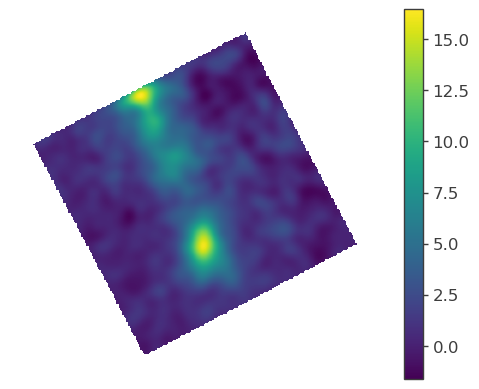

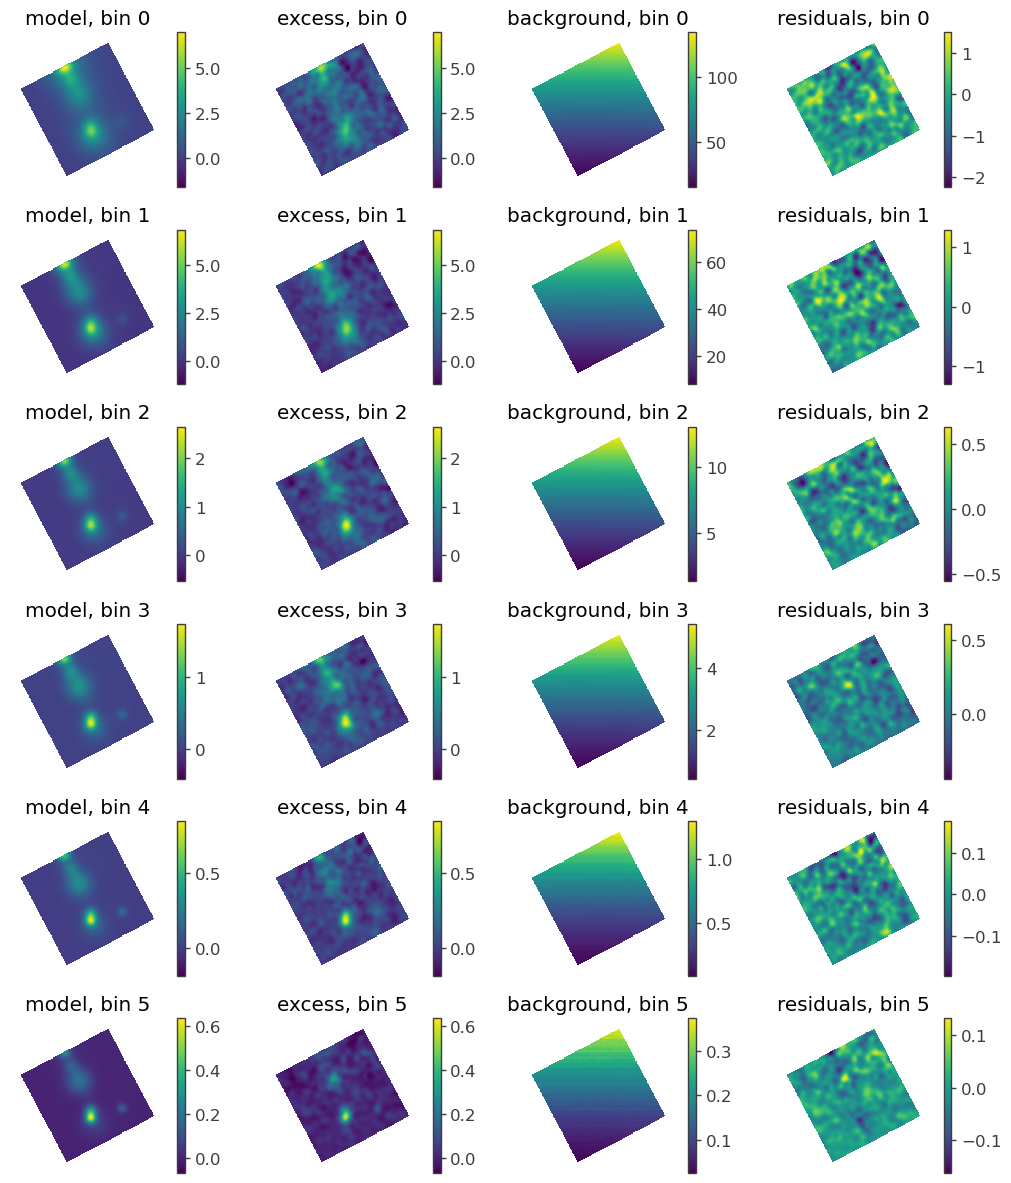

<Figure size 640x480 with 0 Axes>

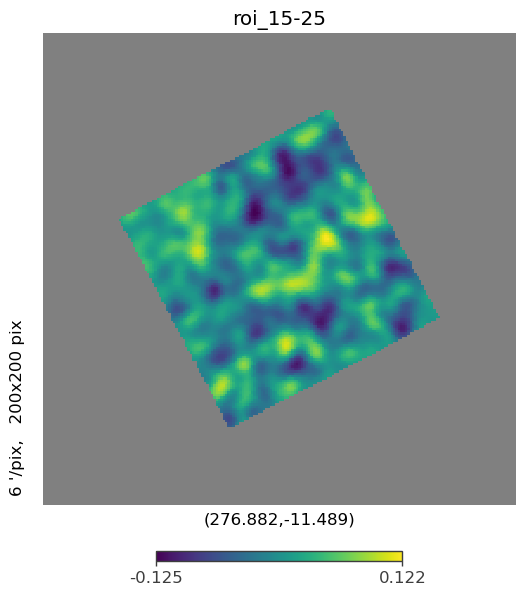

LHAASO:  1 273.36 -12.75  1LHAASO J1813-1245  0.0
LHAASO:  2 273.35 -12.73  1LHAASO J1813-1245   0.0
LHAASO:  3 273.69 -17.33 1LHAASO J1814-1719u*  0.71
LHAASO:  4 273.27 -17.89 1LHAASO J1814-1719u*   0.0
LHAASO:  5 273.72 -16.62  1LHAASO J1814-1636u  0.68
LHAASO:  6 273.72 -16.62  1KM2A J1814-1636u  0
LHAASO:  7 276.29 -14.32 1LHAASO J1825-1418  0.81
LHAASO:  8 276.25 -14.0 1LHAASO J1825-1418   0.81
LHAASO:  9 276.44 -12.94  1LHAASO J1825-1256u  0.0
LHAASO:  10 276.55 -13.04  1LHAASO J1825-1256u   0.24
LHAASO:  11 276.45 -13.63  1LHAASO J1825-1337u  0.0
LHAASO:  12 276.55 -13.73  1LHAASO J1825-1337u   0.17
LHAASO:  13 277.75 -10.12 1LHAASO J1831-1007u*  0.78
LHAASO:  14 277.81 -9.83 1LHAASO J1831-1007u*   0.26
LHAASO:  15 277.84 -10.48  1LHAASO J1831-1028  0.94
LHAASO:  16 277.84 -10.48  1KM2A J1831-1028  0
LHAASO:  17 278.62 -8.53 1LHAASO J1834-0831  0.4
LHAASO:  18 278.44 -8.38 1LHAASO J1834-0831   0.4
LHAASO:  19 279.39 -6.9 1LHAASO J1837-0654u  0.34
LHAASO:  20 279.31 -6.86 1LHAAS

Best fit values:

result             unit
parameter                                                             
Diffuse.spectrum.main.PowerlawM.K  (4 +/- 6) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1417.833034
total        1417.833034

Values of statistical measures:

statistical measures
AIC           2837.666091
BIC           2847.781998

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (4.4 +/- 0.5) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1443.000243
total        1443.000243

Values of statistical measures:

statistical measures
AIC           2888.000507
BIC           2898.116414

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (5.7 +/- 0.8) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1400.700706
total        1400.700706

Values of statistical measures:

statistical measures
AIC           2803.401434
BIC           2813.517341

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (6.0 +/- 0.8) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1322.523483
total        1322.523483

Values of statistical measures:

statistical measures
AIC           2647.046987
BIC           2657.162894

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (1.1 +/- 0.9) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1176.021657
total        1176.021657

Values of statistical measures:

statistical measures
AIC           2354.043336
BIC           2364.159243

Best fit values:

result             unit
parameter                                                             
Diffuse.spectrum.main.PowerlawM.K  (4 +/- 9) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1162.641312
total        1162.641312

Values of statistical measures:

statistical measures
AIC           2327.282645
BIC           2337.398552


100%|██████████| 6/6 [00:57<00:00,  9.52s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



21:48:22 INFO      Region of Interest:                                                                   ]8;id=941064;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=690721;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=503705;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=680908;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (281.522, -2.609), model radius:      ]8;id=568467;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=12252;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.500 deg, display radius: 7.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=338821;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=908348;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=705348;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=103869;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=19351;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=486778;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 90 x 90 px                                                             ]8;id=903564;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=487466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=965885;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=435139;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=813531;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=424164;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=156015;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=935538;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=560395;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=209642;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=421838;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=164168;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=190355;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=670587;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=492665;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=118153;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=155781;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=263804;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=524751;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=382241;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=261338;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=400722;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  5.178574e+06  5.125754e+06  1.010305          30470  \
1   1   1024   RING  2.823704e+06  2.769105e+06  1.019717          30470   
2   2   1024   RING  5.113459e+05  4.910174e+05  1.041401          30470   
3   3   1024   RING  2.168321e+05  2.038489e+05  1.063691          30470   
4   4   1024   RING  5.586728e+04  5.122473e+04  1.090631          30470   
5   5   1024   RING  1.611700e+04  1.409437e+04  1.143506          30470   

   Area (deg^2)  
0     99.895615  
1     99.895615  
2     99.895615  
3     99.895615  
4     99.895615  
5     99.895615

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=424419;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=188441;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.93 Mb                                                         ]8;id=23970;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=940665;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=627218;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=685070;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=503110;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=128811;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=933439;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=595953;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=121145;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=361008;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

21:48:23 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=906391;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=543533;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

21:48:24 INFO      J1834M0831 in model_radius: 7.5 sf:True pf:True kf:True indexf:True                 ]8;id=250137;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=142351;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=823795;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=324400;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=5.99e-13 kb=(5.99e-15, 2.78e-12) index=-3.08 indexb=(-4.00,-1.78)                             

         INFO      Mor:                                                                                ]8;id=402391;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=195387;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.40 sb=(0.05,0.75) fitrange=1.10                                                         

         INFO      J1837M0654u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=19081;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=469004;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=404275;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=648108;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.55e-12 kb=(1.55e-14, 2.63e-12) index=-2.92 indexb=(-3.22,-2.62)                             

         INFO      Mor:                                                                                ]8;id=793220;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=833319;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.34 sb=(0.29,0.39) fitrange=0.30                                                         

         INFO      J1839M0548u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=715913;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=235353;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=599395;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=363580;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=4.62e-13 kb=(4.62e-15, 1.04e-12) index=-2.65 indexb=(-3.05,-2.25)                             

         INFO      Mor:                                                                                ]8;id=876348;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=126097;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.22 sb=(0.12,0.32) fitrange=0.35                                                         

         INFO      J1841M0519 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=972545;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=155143;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=207053;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=464112;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.52e-12 kb=(1.52e-14, 3.20e-12) index=-2.88 indexb=(-3.28,-2.48)                             

         INFO      Mor:                                                                                ]8;id=359577;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=905052;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.60 sb=(0.45,0.75) fitrange=0.45                                                         

         INFO      J1843M0335u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=365942;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=542150;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=506203;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=418550;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=9.01e-13 kb=(9.01e-15, 1.76e-12) index=-2.58 indexb=(-2.88,-2.28)                             

         INFO      Mor:                                                                                ]8;id=883774;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=921139;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.40 sb=(0.30,0.50) fitrange=0.30                                                         

         INFO      J1848M0153u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=290553;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=932342;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=651316;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=207030;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=7.05e-13 kb=(7.05e-15, 1.51e-12) index=-2.65 indexb=(-3.05,-2.25)                             

         INFO      Mor:                                                                                ]8;id=890459;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=754310;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.51 sb=(0.36,0.66) fitrange=0.50                                                         

         INFO      J1850M0004u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=709264;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=1093;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=630719;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=860560;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=5.30e-13 kb=(5.30e-15, 1.17e-12) index=-2.49 indexb=(-2.89,-2.09)                             

         INFO      Mor:                                                                                ]8;id=35924;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=123147;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.46 sb=(0.36,0.56) fitrange=0.40                                                         

         INFO      J1852P0050u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=345767;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=58417;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=982750;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=670741;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=4.67e-13 kb=(4.67e-15, 1.87e-12) index=-2.74 indexb=(-3.34,-2.14)                             

         INFO      Mor:                                                                                ]8;id=641757;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=366884;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.64 sb=(0.29,0.99) fitrange=1.00                                                         

         INFO      J1857P0245 in model_radius: 7.5 sf:True pf:True kf:True indexf:True                 ]8;id=1137;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=957665;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=888177;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=601492;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=4.04e-13 kb=(4.04e-15, 1.54e-12) index=-2.93 indexb=(-3.63,-2.23)                             

         INFO      Mor:                                                                                ]8;id=604471;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=155426;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.24 sb=(0.04,0.44) fitrange=0.55                                                         

         INFO      J1857P0203u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=624119;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=417722;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=895257;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=38957;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.68e-13 kb=(1.68e-15, 1.03e-12) index=-2.46 indexb=(-3.56,-1.36)                             

         INFO      Mor:                                                                                ]8;id=36962;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=381557;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.19 sb=(0.04,0.34) fitrange=0.55                                                         

         INFO      J1858P0330 in model_radius: 7.5 sf:True pf:True kf:True indexf:True                 ]8;id=682889;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=242314;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=192587;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=504731;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=2.84e-13 kb=(2.84e-15, 1.54e-12) index=-2.63 indexb=(-3.63,-1.63)                             

         INFO      Mor:                                                                                ]8;id=573146;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=490396;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.52 sb=(0.12,0.92) fitrange=1.70                                                         

         INFO      Set diffuse range: [21, 37] [-8, 8]                                                ]8;id=544195;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=817413;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1158\1158]8;;\

         INFO      ra dec coner:                                                                      ]8;id=45402;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=722264;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1159\1159]8;;\

         INFO      (284.66287268005993, -14.221694714345416)                                          ]8;id=479766;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=260535;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1160\1160]8;;\

         INFO      (291.8282373790319, -0.053737660060655834)                                         ]8;id=276214;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=903355;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1161\1161]8;;\

         INFO      (277.5482046049872, 7.237553105845498)                                             ]8;id=535412;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=336641;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1162\1162]8;;\

         INFO      (270.2228348770985, -6.8201447811565)                                              ]8;id=927017;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=641127;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1163\1163]8;;\

21:48:25 INFO      total sr: 0.07772890321151499                                                      ]8;id=459270;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=155059;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1202\1202]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.2135965670569618e-05                                                ]8;id=62497;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=251259;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1203\1203]8;;\
                  ratio: 0.09577166669057675                                                                       

         INFO      set K to: 1e-12                                                                    ]8;id=250959;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=654592;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1204\1204]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case11_dust_bkg_template.fits           ]8;id=855084;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=552297;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1231\1231]8;;\

Model summary:
==============

                   N
Point sources      0
Extended sources  12
Particle sources   0

Free parameters (16):
--------------------

                                         value min_value max_value   
J1837M0654u.spectrum.main.Powerlaw.K       0.0       0.0       0.0  \
J1837M0654u.spectrum.main.Powerlaw.index -2.92     -3.22     -2.62   
J1839M0548u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1839M0548u.spectrum.main.Powerlaw.index -2.65     -3.05     -2.25   
J1841M0519.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1841M0519.spectrum.main.Powerlaw.index  -2.88     -3.28     -2.48   
J1843M0335u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1843M0335u.spectrum.main.Powerlaw.index -2.58     -2.88     -2.28   
J1848M0153u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1848M0153u.spectrum.main.Powerlaw.index -2.65     -3.05     -2.25   
J1850M0004u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1850M0004u.spectrum.main.Powerlaw.index -2.49     -2.89     -2.09   
J1852P0050u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1852P0050u.spectrum.main.Powerlaw.index -2.74     -3.34     -2.14   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.5      -4.5      -0.5   

                                                    unit  
J1837M0654u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1837M0654u.spectrum.main.Powerlaw.index                  
J1839M0548u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1839M0548u.spectrum.main.Powerlaw.index                  
J1841M0519.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1841M0519.spectrum.main.Powerlaw.index                   
J1843M0335u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1843M0335u.spectrum.main.Powerlaw.index                  
J1848M0153u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1848M0153u.spectrum.main.Powerlaw.index                  
J1850M0004u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1850M0004u.spectrum.main.Powerlaw.index                  
J1852P0050u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1852P0050u.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (56):
---------------------

                                                                                      value   
J1834M0831.Gaussian_on_sphere.lon0                                                   278.62  \
J1834M0831.Gaussian_on_sphere.lat0                                                    -8.53   
J1834M0831.Gaussian_on_sphere.sigma                                                     0.4   
J1834M0831.spectrum.main.Powerlaw.K                                                     0.0   
J1834M0831.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1834M0831.spectrum.main.Powerlaw.index                                               -3.08   
J1837M0654u.Gaussian_on_sphere.lon0                                                  279.39   
J1837M0654u.Gaussian_on_sphere.lat0                                                    -6.9   
J1837M0654u.Gaussian_on_sphere.sigma                                                   0.34   
J1837M0654u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1839M0548u.Gaussian_on_sphere.lon0                                                  279.85   
J1839M0548u.Gaussian_on_sphere.lat0                                                    -5.9   
J1839M0548u.Gaussian_on_sphere.sigma                                                   0.22   
J1839M0548u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1841M0519.Gaussian_on_sphere.lon0                                                   280.33   
J1841M0519.Gaussian_on_sphere.lat0                                             

21:48:26 INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=977539;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=984463;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=937386;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=653710;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=513981;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=102854;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=53437;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=639902;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=865687;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=827280;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=716392;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=805698;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=257576;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=605482;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.330                      ]8;id=558338;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=48060;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=287158;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=830275;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=604069;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=71971;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1848M0153u           ]8;id=493158;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=914197;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=14930;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=238465;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=878609;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=389785;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=423903;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=811026;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1852P0050u           ]8;id=392299;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=220511;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=794966;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=916227;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=624841;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=415648;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=96788;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=387235;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=843480;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=520420;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=856068;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=71239;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1858P0330            ]8;id=429365;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=105682;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=618688;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=336090;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=331990;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=380956;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.359                      ]8;id=34110;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=372519;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=969164;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=869161;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=815757;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=40077;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                               
J1837M0654u.spectrum.main.Powerlaw.K         (1.33 +/- 0.06) x 10^-21  \
J1837M0654u.spectrum.main.Powerlaw.index               -2.86 +/- 0.04   
J1839M0548u.spectrum.main.Powerlaw.K         (4.4 -0.4 +0.5) x 10^-22   
J1839M0548u.spectrum.main.Powerlaw.index               -2.69 +/- 0.07   
J1841M0519.spectrum.main.Powerlaw.K          (1.21 +/- 0.06) x 10^-21   
J1841M0519.spectrum.main.Powerlaw.index                -2.81 +/- 0.04   
J1843M0335u.spectrum.main.Powerlaw.K           (7.8 +/- 0.4) x 10^-22   
J1843M0335u.spectrum.main.Powerlaw.index             -2.546 +/- 0.034   
J1848M0153u.spectrum.main.Powerlaw.K           (5.5 +/- 0.4) x 10^-22   
J1848M0153u.spectrum.main.Powerlaw.index               -2.63 +/- 0.05   
J1850M0004u.spectrum.main.Powerlaw.K      (5.54 -0.32 +0.34) x 10^-22   
J1850M0004u.spectrum.main.Powerlaw.index               -2.45 +/- 0.04   
J1852P0050u.spectrum.main.Powerlaw.K           (3.1 +/- 0.4) x 10^-22   
J1852P0050u.spectrum.main.Powerlaw.index               -2.58 +/- 0.08   
Diffuse.spectrum.main.Powerlaw.K          (3.52 -0.30 +0.33) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                   -2.65 +/- 0.05   

                                                     unit  
parameter                                                  
J1837M0654u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1837M0654u.spectrum.main.Powerlaw.index                   
J1839M0548u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1839M0548u.spectrum.main.Powerlaw.index                   
J1841M0519.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1841M0519.spectrum.main.Powerlaw.index                    
J1843M0335u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1843M0335u.spectrum.main.Powerlaw.index                   
J1848M0153u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1848M0153u.spectrum.main.Powerlaw.index                   
J1850M0004u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1850M0004u.spectrum.main.Powerlaw.index                   
J1852P0050u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1852P0050u.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.63 -0.25  0.19  0.05  0.02 ...  0.09 -0.04  0.13 -0.04 -0.22  0.07
-0.63  1.00  0.15 -0.16  0.01 -0.01 ... -0.03  0.03 -0.03  0.04  0.06 -0.13
-0.25  0.15  1.00 -0.78 -0.50  0.28 ...  0.02 -0.01  0.03 -0.01 -0.05  0.03
 0.19 -0.16 -0.78  1.00  0.35 -0.36 ... -0.01  0.01 -0.01  0.02  0.02 -0.06
 0.05  0.01 -0.50  0.35  1.00 -0.56 ...  0.11 -0.05  0.18 -0.06 -0.29  0.09
 0.02 -0.01  0.28 -0.36 -0.56  1.00 ... -0.03  0.04 -0.03  0.06  0.07 -0.18
 0.09 -0.02  0.08 -0.05 -0.03  0.08 ...  0.17 -0.09  0.24 -0.09 -0.40  0.17
-0.03  0.03 -0.06  0.05  0.07 -0.06 ... -0.08  0.08 -0.10  0.09  0.18 -0.25
 0.13 -0.03  0.03 -0.01  0.18 -0.04 ...  0.13 -0.03  0.37 -0.13 -0.60  0.22
-0.04  0.05 -0.01  0.02 -0.05  0.07 ... -0.01  0.02 -0.13  0.14  0.23 -0.38
 0.09 -0.03  0.02 -0.01  0.11 -0.03 ...  1.00 -0.80  0.06  0.04 -0.39  0.19
-0.04  0.03 -0.01  0.01 -0.05  0.04 ... -0.80  1.00  0.02 -0.05  0.21 -0.25
 0.13 -0.03  0.03 -0.01  0.18 -0.03 ...  0.06  0.02  1.00 -0.60 -0.60  0.22
-0.04  0.04 -0.01  0.02 -0.06  0.06 ...  0.04 -0.05 -0.60  1.00  0.23 -0.34
-0.22  0.06 -0.05  0.02 -0.29  0.07 ... -0.39  0.21 -0.60  0.23  1.00 -0.42
 0.07 -0.13  0.03 -0.06  0.09 -0.18 ...  0.19 -0.25  0.22 -0.34 -0.42  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        8859.223131
total       8859.223131

Values of statistical measures:

statistical measures
AIC          17750.449238
BIC          17912.306380

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

21:49:45 INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=704828;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=451078;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=232617;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=104078;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=2730;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=251521;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=991553;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=846319;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=807626;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=458523;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=617162;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=300860;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=990994;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=390614;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.330                      ]8;id=229904;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=702028;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=388195;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=469724;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=186638;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=305877;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1848M0153u           ]8;id=240320;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=491408;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=101096;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=912250;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=407686;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=856667;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=442869;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=495822;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1852P0050u           ]8;id=524212;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=842011;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=952829;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=738349;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=970297;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=572333;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=400352;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=520773;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=12041;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=492365;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=864692;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=89940;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1858P0330            ]8;id=238149;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=80024;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=199501;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=103023;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=631774;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=742712;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.359                      ]8;id=484529;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=159525;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(280.1953125, 1.0072042482155723)


<Figure size 640x480 with 0 Axes>

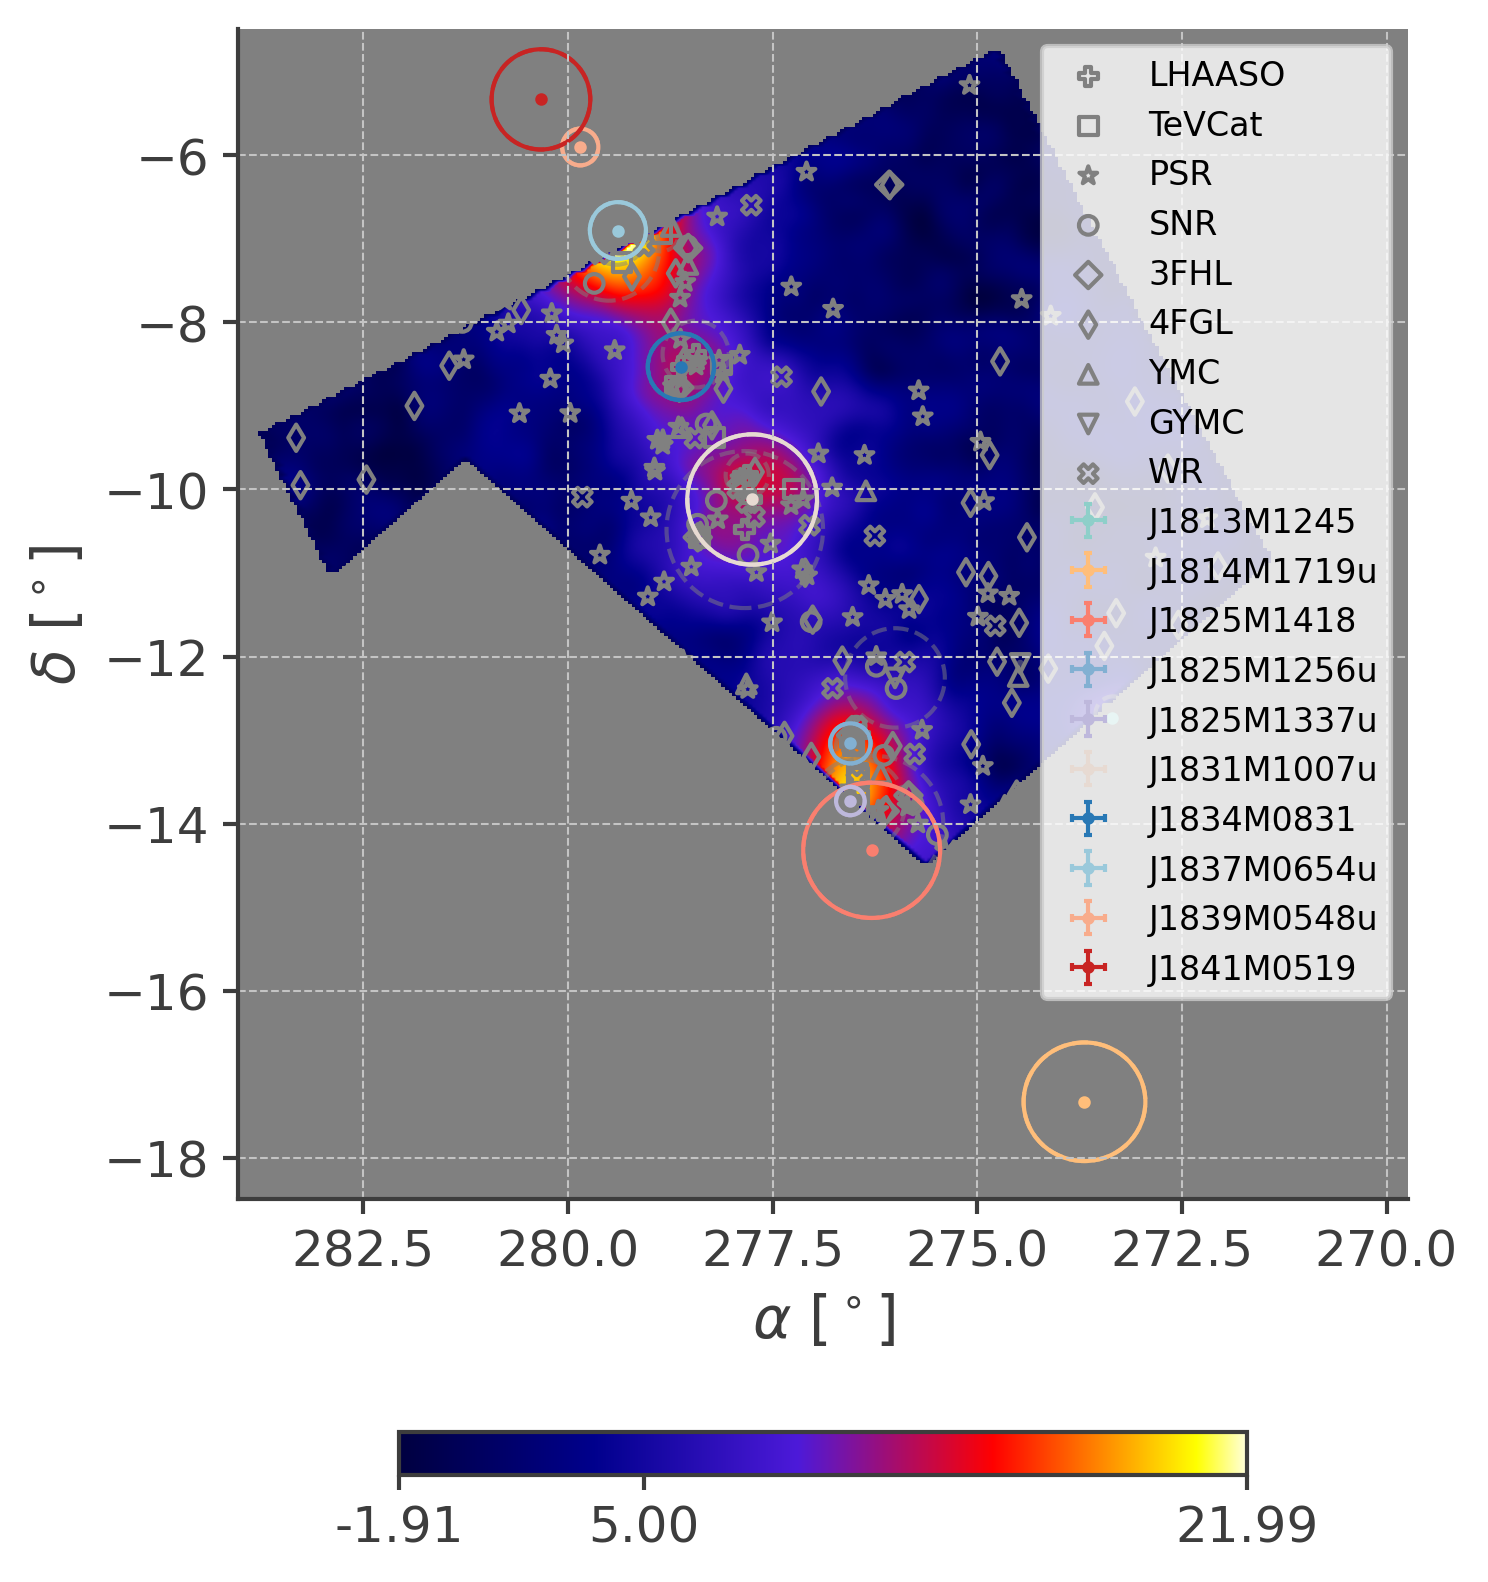

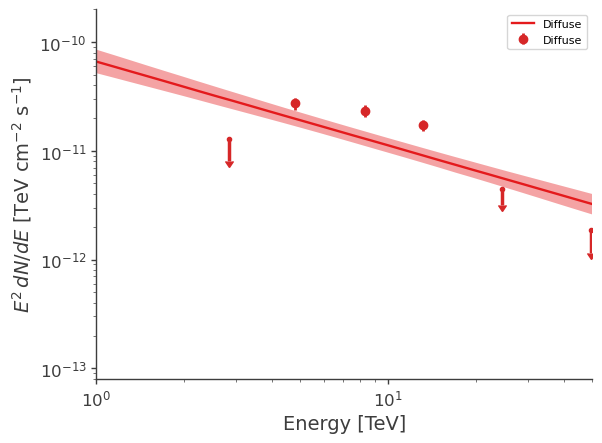

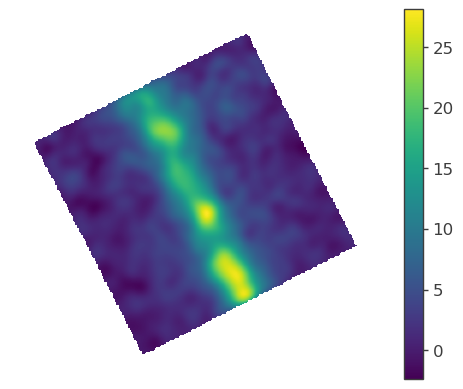

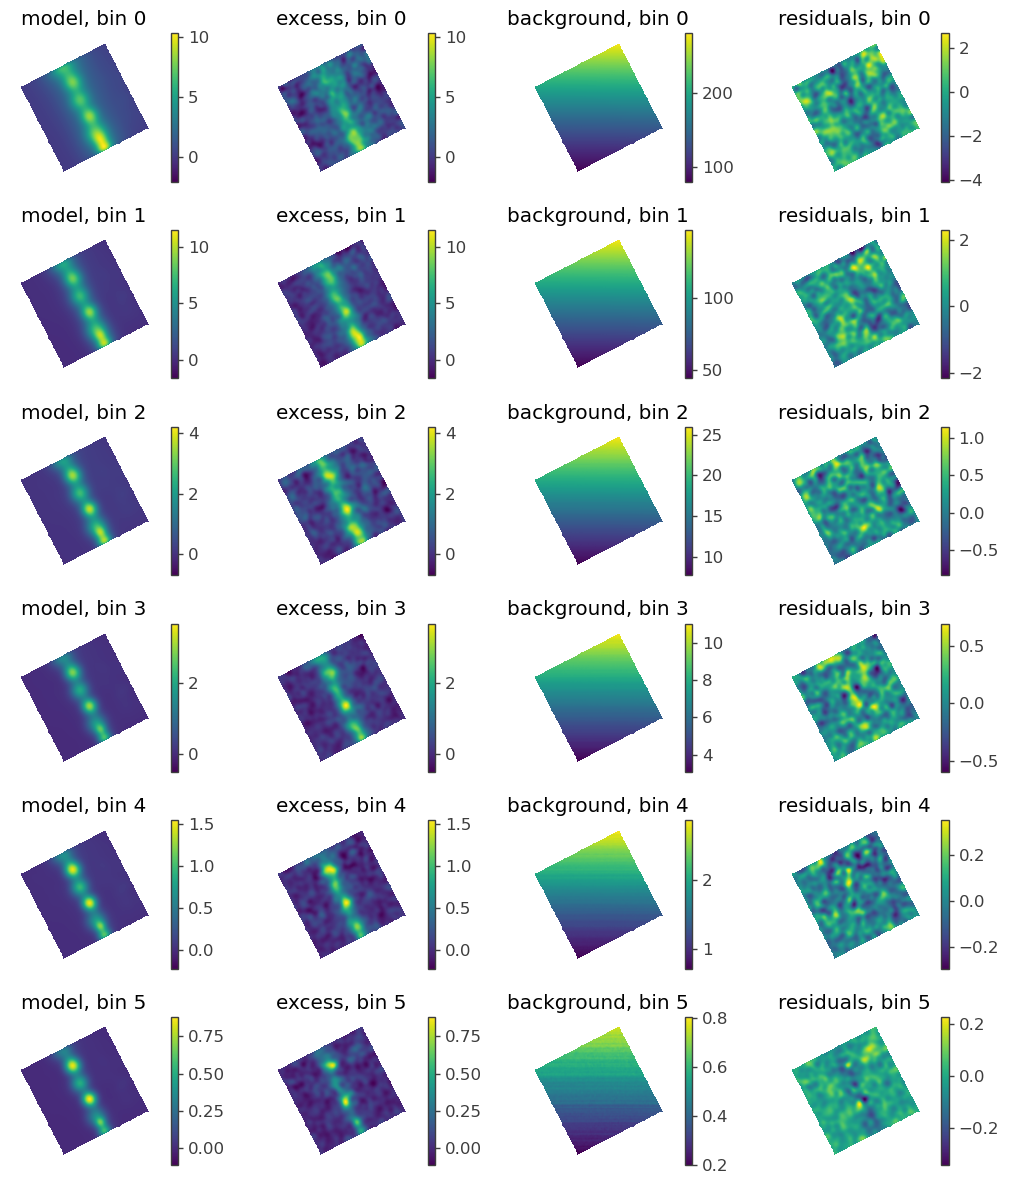

<Figure size 640x480 with 0 Axes>

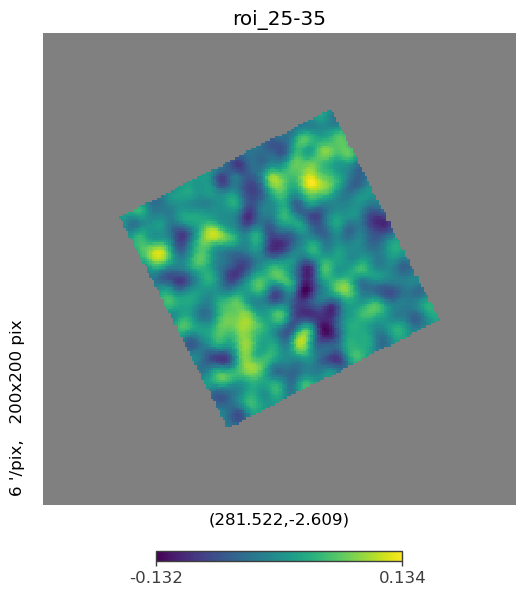

LHAASO:  1 278.62 -8.53 1LHAASO J1834-0831  0.4
LHAASO:  2 278.44 -8.38 1LHAASO J1834-0831   0.4
LHAASO:  3 279.39 -6.9 1LHAASO J1837-0654u  0.34
LHAASO:  4 279.31 -6.86 1LHAASO J1837-0654u   0.33
LHAASO:  5 279.79 -5.81  1LHAASO J1839-0548u  0.22
LHAASO:  6 279.85 -5.9  1LHAASO J1839-0548u   0.22
LHAASO:  7 280.33 -5.33 1LHAASO J1841-0519  0.6
LHAASO:  8 280.21 -5.23 1LHAASO J1841-0519   0.62
LHAASO:  9 280.91 -3.6  1LHAASO J1843-0335u  0.36
LHAASO:  10 281.01 -3.5  1LHAASO J1843-0335u   0.4
LHAASO:  11 282.06 -1.89 1LHAASO J1848-0153u  0.51
LHAASO:  12 282.02 -1.78 1LHAASO J1848-0153u   0.56
LHAASO:  13 282.19 -0.02  1LHAASO J1848-0001u  0.0
LHAASO:  14 282.19 -0.02  1KM2A J1848-0001u  0
LHAASO:  15 282.74 -0.07 1LHAASO J1850-0004u*  0.46
LHAASO:  16 282.89 -0.07 1LHAASO J1850-0004u*   0.21
LHAASO:  17 283.1 0.84  1LHAASO J1852+0050u*  0.85
LHAASO:  18 283.73 1.4  1LHAASO J1852+0050u*   0.64
LHAASO:  19 284.37 2.75 1LHAASO J1857+0245  0.24
LHAASO:  20 284.38 2.06  1WCDA J1857+0203u  

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.15 +/- 0.32) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1563.962848
total        1563.962848

Values of statistical measures:

statistical measures
AIC           3129.925718
BIC           3140.041953

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (4.14 +/- 0.28) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1544.215089
total        1544.215089

Values of statistical measures:

statistical measures
AIC           3090.430200
BIC           3100.546435

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (5.7 +/- 0.4) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1511.973829
total        1511.973829

Values of statistical measures:

statistical measures
AIC           3025.947680
BIC           3036.063915

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (5.24 +/- 0.35) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1468.724995
total        1468.724995

Values of statistical measures:

statistical measures
AIC           2939.450011
BIC           2949.566246

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (3.1 +/- 0.4) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1317.090556
total        1317.090556

Values of statistical measures:

statistical measures
AIC           2636.181135
BIC           2646.297370

Best fit values:

result             unit
parameter                                                             
Diffuse.spectrum.main.PowerlawM.K  (5 +/- 4) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1371.703136
total        1371.703136

Values of statistical measures:

statistical measures
AIC           2745.406293
BIC           2755.522529

100%|██████████| 6/6 [00:55<00:00,  9.26s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



21:52:08 INFO      Region of Interest:                                                                   ]8;id=450990;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=419890;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=270405;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=248764;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (286.095, 6.287), model radius: 7.500 ]8;id=27939;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=38209;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  deg, display radius: 7.000 deg, threshold = 0.50                                                 

         INFO                                                                                            ]8;id=145272;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=731690;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=880584;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=729004;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=849095;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=319869;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 90 x 90 px                                                             ]8;id=473374;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=205984;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=206315;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=373749;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=47879;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=841553;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=941412;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=802359;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=633151;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=427711;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=120408;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=328819;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=146071;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=489957;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=852718;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=843486;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=406522;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=679508;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=835578;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=186731;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=557756;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=778765;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  9.849485e+06  9.777575e+06  1.007355          30462  \
1   1   1024   RING  5.175322e+06  5.094172e+06  1.015930          30462   
2   2   1024   RING  9.182871e+05  8.884714e+05  1.033558          30462   
3   3   1024   RING  3.969280e+05  3.766242e+05  1.053910          30462   
4   4   1024   RING  1.072815e+05  9.892997e+04  1.084418          30462   
5   5   1024   RING  2.961811e+04  2.627849e+04  1.127086          30462   

   Area (deg^2)  
0     99.869387  
1     99.869387  
2     99.869387  
3     99.869387  
4     99.869387  
5     99.869387

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=405549;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=466302;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=398276;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=532017;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=262281;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=720005;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=176698;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=729891;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=396517;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=146842;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=762971;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=177019;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

21:52:09 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=586752;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=590913;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

21:52:10 INFO      J1850M0004u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=957581;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=247870;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=716773;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=220983;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=5.30e-13 kb=(5.30e-15, 1.17e-12) index=-2.49 indexb=(-2.89,-2.09)                             

         INFO      Mor:                                                                                ]8;id=315261;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=357878;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.46 sb=(0.36,0.56) fitrange=0.40                                                         

         INFO      J1852P0050u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=563840;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=223985;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=114005;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=764119;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=4.67e-13 kb=(4.67e-15, 1.87e-12) index=-2.74 indexb=(-3.34,-2.14)                             

         INFO      Mor:                                                                                ]8;id=938022;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=504011;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.64 sb=(0.29,0.99) fitrange=1.00                                                         

         INFO      J1857P0245 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=146783;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=523194;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=604958;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=11354;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=4.04e-13 kb=(4.04e-15, 1.54e-12) index=-2.93 indexb=(-3.63,-2.23)                             

         INFO      Mor:                                                                                ]8;id=877601;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=559772;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.24 sb=(0.04,0.44) fitrange=0.55                                                         

         INFO      J1857P0203u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=401309;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=21625;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=32329;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=916888;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.68e-13 kb=(1.68e-15, 1.03e-12) index=-2.46 indexb=(-3.56,-1.36)                             

         INFO      Mor:                                                                                ]8;id=879575;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=976250;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.19 sb=(0.04,0.34) fitrange=0.55                                                         

21:52:11 INFO      J1858P0330 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=268486;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=940210;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=100392;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=943381;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=2.84e-13 kb=(2.84e-15, 1.54e-12) index=-2.63 indexb=(-3.63,-1.63)                             

         INFO      Mor:                                                                                ]8;id=191548;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=622089;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.52 sb=(0.12,0.92) fitrange=1.70                                                         

         INFO      J1902P0648 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=764570;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=185587;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=360586;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=1902;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=4.50e-14 kb=(1.00e-15, 3.05e-13) index=-2.39 indexb=(-4.00,-1.00)                             

         INFO      Mor: fitrange=0.50                                                                  ]8;id=431026;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=587708;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\

         INFO      J1906P0712 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=969421;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=464367;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=955473;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=175271;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.01e-13 kb=(1.01e-15, 6.01e-13) index=-2.72 indexb=(-4.00,-1.22)                             

         INFO      Mor:                                                                                ]8;id=397535;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=510150;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.21 sb=(0.00,0.46) fitrange=1.05                                                         

         INFO      J1907P0826 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=705433;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=747252;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=208878;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=813937;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.34e-13 kb=(1.34e-15, 7.14e-13) index=-2.62 indexb=(-4.00,-1.22)                             

         INFO      Mor:                                                                                ]8;id=614657;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=510257;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.43 sb=(0.03,0.83) fitrange=1.55                                                         

         INFO      J1908P0615u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=354272;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=154175;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=38233;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=635317;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=7.97e-13 kb=(7.97e-15, 1.88e-12) index=-2.42 indexb=(-2.72,-2.12)                             

         INFO      Mor:                                                                                ]8;id=828268;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=132374;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.43 sb=(0.33,0.53) fitrange=0.25                                                         

         INFO      J1910P0516 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=176942;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=794348;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=278603;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=26704;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=8.60e-14 kb=(1.00e-15, 6.66e-13) index=-2.54 indexb=(-4.00,-1.04)                             

         INFO      Mor:                                                                                ]8;id=71830;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=592120;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.29 sb=(0.00,0.74) fitrange=1.90                                                         

         INFO      J1912P1014u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=729311;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=87009;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=820744;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=615874;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=3.07e-13 kb=(3.07e-15, 7.87e-13) index=-2.68 indexb=(-3.28,-2.08)                             

         INFO      Mor:                                                                                ]8;id=672093;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=938763;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.36 sb=(0.21,0.51) fitrange=0.40                                                         

         INFO      J1914P1150u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=246819;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=407789;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=116900;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=194297;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.09e-13 kb=(1.09e-15, 3.49e-13) index=-2.34 indexb=(-3.04,-1.64)                             

         INFO      Mor:                                                                                ]8;id=794296;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=902032;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.33 sb=(0.13,0.53) fitrange=0.70                                                         

         INFO      Set diffuse range: [31, 47] [-8, 8]                                                ]8;id=611433;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=238548;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1158\1158]8;;\

         INFO      ra dec coner:                                                                      ]8;id=623755;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=340746;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1159\1159]8;;\

         INFO      (289.1237501126153, -5.346118102161174)                                            ]8;id=586033;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=713434;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1160\1160]8;;\

         INFO      (296.5291083447021, 8.671403139733373)                                             ]8;id=409864;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=535088;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1161\1161]8;;\

         INFO      (282.018324697397, 16.12231323547236)                                              ]8;id=198219;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=630351;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1162\1162]8;;\

         INFO      (274.85999095399006, 1.9340616592345006)                                           ]8;id=227162;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=247401;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1163\1163]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=544122;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=534483;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1202\1202]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.096060119544788e-05                                                 ]8;id=436109;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=348335;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1203\1203]8;;\
                  ratio: 0.0864962107600871                                                                        

         INFO      set K to: 1e-12                                                                    ]8;id=93004;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=723923;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1204\1204]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case11_dust_bkg_template.fits           ]8;id=380366;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=638737;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1231\1231]8;;\

Model summary:
==============

                   N
Point sources      1
Extended sources  12
Particle sources   0

Free parameters (20):
--------------------

                                         value min_value max_value   
J1857P0245.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J1857P0245.spectrum.main.Powerlaw.index  -2.93     -3.63     -2.23   
J1857P0203u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1857P0203u.spectrum.main.Powerlaw.index -2.46     -3.56     -1.36   
J1858P0330.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1858P0330.spectrum.main.Powerlaw.index  -2.63     -3.63     -1.63   
J1902P0648.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1902P0648.spectrum.main.Powerlaw.index  -2.39      -4.0      -1.0   
J1906P0712.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1906P0712.spectrum.main.Powerlaw.index  -2.72      -4.0     -1.22   
J1907P0826.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1907P0826.spectrum.main.Powerlaw.index  -2.62      -4.0     -1.22   
J1908P0615u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1908P0615u.spectrum.main.Powerlaw.index -2.42     -2.72     -2.12   
J1910P0516.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1910P0516.spectrum.main.Powerlaw.index  -2.54      -4.0     -1.04   
J1912P1014u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1912P1014u.spectrum.main.Powerlaw.index -2.68     -3.28     -2.08   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.5      -4.5      -0.5   

                                                    unit  
J1857P0245.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1857P0245.spectrum.main.Powerlaw.index                   
J1857P0203u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1857P0203u.spectrum.main.Powerlaw.index                  
J1858P0330.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1858P0330.spectrum.main.Powerlaw.index                   
J1902P0648.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1902P0648.spectrum.main.Powerlaw.index                   
J1906P0712.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1906P0712.spectrum.main.Powerlaw.index                   
J1907P0826.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1907P0826.spectrum.main.Powerlaw.index                   
J1908P0615u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1908P0615u.spectrum.main.Powerlaw.index                  
J1910P0516.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1910P0516.spectrum.main.Powerlaw.index                   
J1912P1014u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1912P1014u.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (57):
---------------------

                                                                                      value   
J1850M0004u.Gaussian_on_sphere.lon0                                                  282.74  \
J1850M0004u.Gaussian_on_sphere.lat0                                                   -0.07   
J1850M0004u.Gaussian_on_sphere.sigma                                                   0.46   
J1850M0004u.spectrum.main.Powerlaw.K                                                    0.0   
J1850M0004u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1850M0004u.spectrum.main.Powerlaw.index                                              -2.49   
J1852P0050u.Gaussian_on_sphere.lon0                                                  283.73   
J1852P0050u.Gaussian_on_sphere.lat0                                                     1.4   
J1852P0050u.Gaussian_on_sphere.sigma                                                   0.64   
J1852P0050u.spectrum.main.Powerlaw.K                                                    0.0   
J1852P0050u.spectrum.main.Powerlaw.piv

21:52:12 INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=536707;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=195790;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=317823;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=975609;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1852P0050u           ]8;id=229554;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=413023;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=906647;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=105321;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=423402;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=17419;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=324097;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=404874;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=230466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=385339;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=980464;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=895829;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1858P0330            ]8;id=389701;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=714920;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=659251;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=556038;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=656084;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=991226;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=25512;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=202236;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1907P0826            ]8;id=266672;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=789695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.440                       ]8;id=297061;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=18152;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=265905;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=732392;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=31756;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=198624;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1910P0516            ]8;id=992697;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=593180;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=472895;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=249236;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=262578;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=680538;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=330898;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=358746;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1914P1150u           ]8;id=88285;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=27123;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=912567;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=620830;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=87774;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=218684;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.521                       ]8;id=821948;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=272417;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=145142;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=558645;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=315296;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=906966;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                               
J1857P0245.spectrum.main.Powerlaw.K       (3.48 -0.18 +0.19) x 10^-22  \
J1857P0245.spectrum.main.Powerlaw.index                -2.80 +/- 0.05   
J1857P0203u.spectrum.main.Powerlaw.K      (1.31 -0.17 +0.20) x 10^-22   
J1857P0203u.spectrum.main.Powerlaw.index               -2.40 +/- 0.09   
J1858P0330.spectrum.main.Powerlaw.K       (2.13 -0.25 +0.28) x 10^-22   
J1858P0330.spectrum.main.Powerlaw.index                -2.61 +/- 0.09   
J1902P0648.spectrum.main.Powerlaw.K          (3.7 -1.3 +2.0) x 10^-23   
J1902P0648.spectrum.main.Powerlaw.index                -2.30 +/- 0.25   
J1906P0712.spectrum.main.Powerlaw.K          (8.0 -1.3 +1.6) x 10^-23   
J1906P0712.spectrum.main.Powerlaw.index                -2.59 +/- 0.14   
J1907P0826.spectrum.main.Powerlaw.K          (7.5 -1.5 +1.9) x 10^-23   
J1907P0826.spectrum.main.Powerlaw.index                -2.56 +/- 0.16   
J1908P0615u.spectrum.main.Powerlaw.K         (8.11 +/- 0.23) x 10^-22   
J1908P0615u.spectrum.main.Powerlaw.index             -2.411 +/- 0.022   
J1910P0516.spectrum.main.Powerlaw.K       (1.13 -0.14 +0.16) x 10^-22   
J1910P0516.spectrum.main.Powerlaw.index                -2.49 +/- 0.09   
J1912P1014u.spectrum.main.Powerlaw.K      (2.45 -0.14 +0.15) x 10^-22   
J1912P1014u.spectrum.main.Powerlaw.index               -2.67 +/- 0.06   
Diffuse.spectrum.main.Powerlaw.K          (3.83 -0.15 +0.16) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                 -2.568 +/- 0.029   

                                                     unit  
parameter                                                  
J1857P0245.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1857P0245.spectrum.main.Powerlaw.index                    
J1857P0203u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1857P0203u.spectrum.main.Powerlaw.index                   
J1858P0330.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1858P0330.spectrum.main.Powerlaw.index                    
J1902P0648.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1902P0648.spectrum.main.Powerlaw.index                    
J1906P0712.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1906P0712.spectrum.main.Powerlaw.index                    
J1907P0826.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1907P0826.spectrum.main.Powerlaw.index                    
J1908P0615u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1908P0615u.spectrum.main.Powerlaw.index                   
J1910P0516.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1910P0516.spectrum.main.Powerlaw.index                    
J1912P1014u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1912P1014u.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.44 -0.34  0.24 -0.28  0.16 ...  0.01 -0.01  0.05 -0.03 -0.12  0.07
-0.44  1.00  0.18 -0.20  0.15 -0.20 ... -0.01  0.01 -0.03  0.04  0.06 -0.12
-0.34  0.18  1.00 -0.83  0.12 -0.05 ...  0.01 -0.01  0.06 -0.03 -0.15  0.07
 0.24 -0.20 -0.83  1.00 -0.08  0.06 ... -0.01  0.01 -0.04  0.03  0.10 -0.11
-0.28  0.15  0.12 -0.08  1.00 -0.58 ...  0.03 -0.02  0.20 -0.09 -0.47  0.22
 0.16 -0.20 -0.05  0.06 -0.58  1.00 ... -0.01  0.02 -0.10  0.11  0.24 -0.34
 0.05 -0.02  0.04 -0.05  0.19 -0.15 ...  0.07 -0.09  0.15 -0.13 -0.39  0.29
-0.05  0.02 -0.04  0.05 -0.17  0.15 ... -0.06  0.09 -0.14  0.12  0.36 -0.29
 0.02 -0.02  0.02 -0.01  0.07 -0.03 ...  0.05 -0.02  0.07 -0.03 -0.16  0.09
-0.01  0.02 -0.01  0.01 -0.03  0.04 ... -0.03  0.02 -0.04  0.04  0.08 -0.14
 0.06 -0.02  0.07 -0.04  0.23 -0.11 ...  0.04 -0.03  0.14 -0.04 -0.47  0.22
-0.03  0.04 -0.03  0.04 -0.10  0.12 ... -0.02  0.03 -0.05  0.06  0.23 -0.32
 0.04 -0.02  0.05 -0.04  0.13 -0.07 ... -0.14  0.11  0.12 -0.07 -0.29  0.18
-0.02  0.03 -0.03  0.04 -0.08  0.08 ...  0.10 -0.09 -0.08  0.07  0.19 -0.23
 0.01 -0.01  0.01 -0.01  0.03 -0.01 ...  1.00 -0.71  0.04 -0.02 -0.10  0.06
-0.01  0.01 -0.01  0.01 -0.02  0.02 ... -0.71  1.00 -0.03  0.03  0.08 -0.08
 0.05 -0.03  0.06 -0.04  0.20 -0.10 ...  0.04 -0.03  1.00 -0.44 -0.42  0.22
-0.03  0.04 -0.03  0.03 -0.09  0.11 ... -0.02  0.03 -0.44  1.00  0.20 -0.30
-0.12  0.06 -0.15  0.10 -0.47  0.24 ... -0.10  0.08 -0.42  0.20  1.00 -0.52
 0.07 -0.12  0.07 -0.11  0.22 -0.34 ...  0.06 -0.08  0.22 -0.30 -0.52  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        9184.556351
total       9184.556351

Values of statistical measures:

statistical measures
AIC          18409.117299
BIC          18611.432598

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

21:53:56 INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=310632;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=837041;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=631868;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=404808;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1852P0050u           ]8;id=101176;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=124078;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=340320;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=245306;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=615250;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=513607;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=627293;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=333201;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=400659;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=371731;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=833799;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=308455;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1858P0330            ]8;id=757535;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=916448;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=171888;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=13829;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=578782;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=926136;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=156684;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=864849;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1907P0826            ]8;id=405814;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=182020;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.440                       ]8;id=524466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=528505;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=393026;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=171109;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=544512;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=985402;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1910P0516            ]8;id=120506;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=222883;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=398653;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=829943;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=648254;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=696487;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=100211;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=213269;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1914P1150u           ]8;id=647027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=78817;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=818247;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=77134;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=639911;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=121368;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.521                       ]8;id=833318;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=666457;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(286.3916015625, 5.079715792733467)


<Figure size 640x480 with 0 Axes>

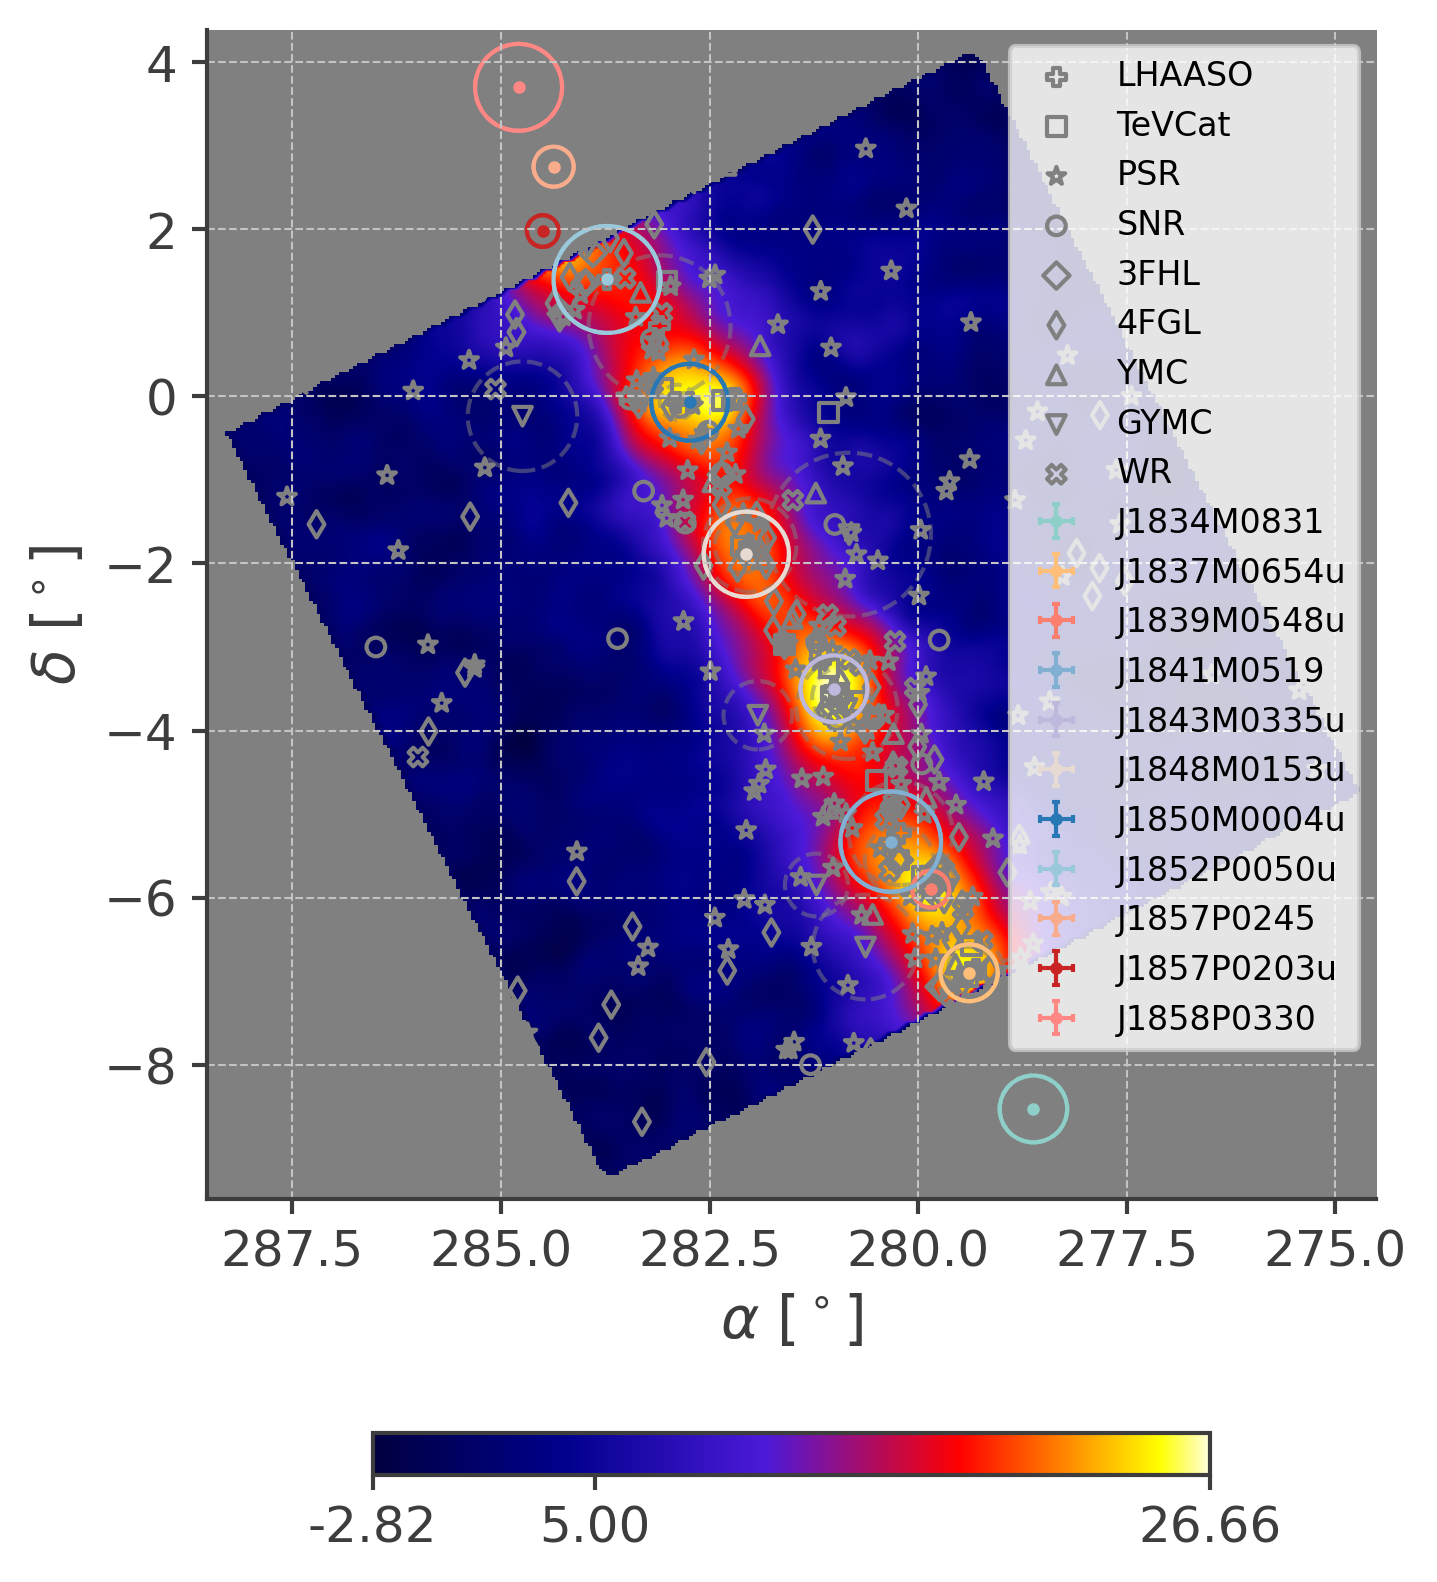

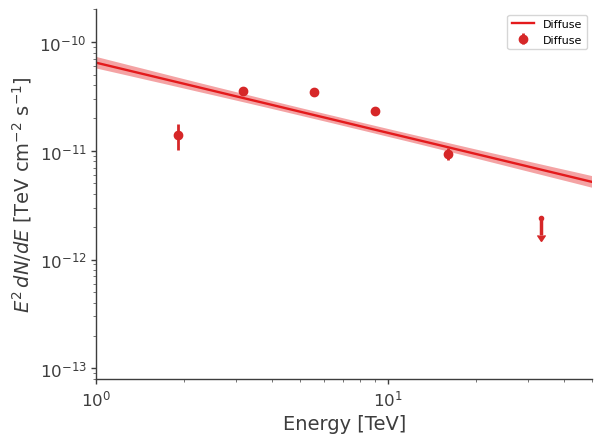

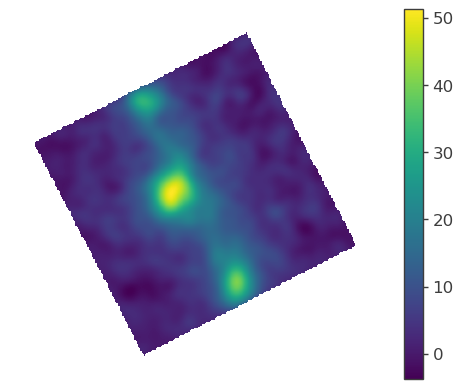

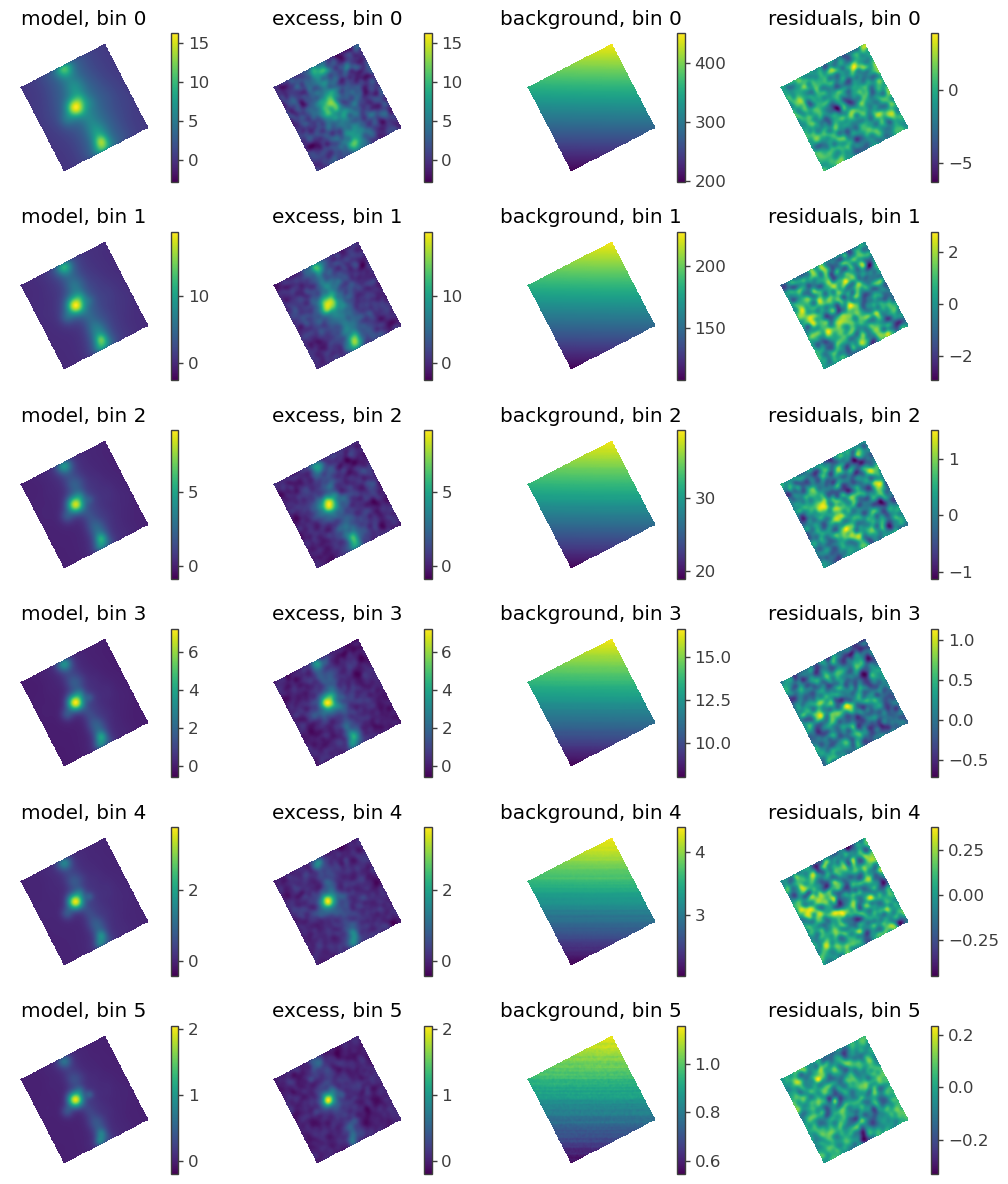

<Figure size 640x480 with 0 Axes>

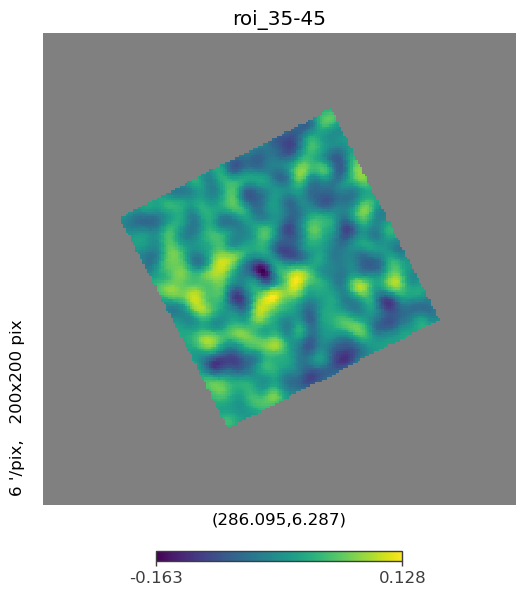

LHAASO:  1 282.19 -0.02  1LHAASO J1848-0001u  0.0
LHAASO:  2 282.19 -0.02  1KM2A J1848-0001u  0
LHAASO:  3 282.74 -0.07 1LHAASO J1850-0004u*  0.46
LHAASO:  4 282.89 -0.07 1LHAASO J1850-0004u*   0.21
LHAASO:  5 283.1 0.84  1LHAASO J1852+0050u*  0.85
LHAASO:  6 283.73 1.4  1LHAASO J1852+0050u*   0.64
LHAASO:  7 284.37 2.75 1LHAASO J1857+0245  0.24
LHAASO:  8 284.38 2.06  1WCDA J1857+0203u  0.28
LHAASO:  9 284.5 1.98  1LHAASO J1857+0203u   0.19
LHAASO:  10 284.59 3.51  1LHAASO J1858+0330  0.43
LHAASO:  11 284.79 3.7  1LHAASO J1858+0330   0.52
LHAASO:  12 285.58 6.8 1LHAASO J1902+0648  0.0
LHAASO:  13 286.56 7.2 1WCDA J1906+0712  0.21
LHAASO:  14 286.96 8.44 1WCDA J1907+0826  0.43
LHAASO:  15 287.05 6.26  1WCDA J1908+0615u  0.36
LHAASO:  16 287.05 6.26  1LHAASO J1908+0615u   0.43
LHAASO:  17 287.55 5.28  1LHAASO J1910+0516*  0.0
LHAASO:  18 287.88 5.07  1LHAASO J1910+0516*   0.29
LHAASO:  19 288.22 10.25 1LHAASO J1912+1014u  0.36
LHAASO:  20 288.38 10.5 1LHAASO J1912+1014u   0.5
LHAASO:  2

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.30 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1514.252579
total        1514.252579

Values of statistical measures:

statistical measures
AIC           3030.505180
BIC           3040.621153

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (4.42 +/- 0.17) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1604.447625
total        1604.447625

Values of statistical measures:

statistical measures
AIC           3210.895271
BIC           3221.011244

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (4.83 +/- 0.22) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1571.320476
total        1571.320476

Values of statistical measures:

statistical measures
AIC           3144.640974
BIC           3154.756947

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (4.39 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1550.125615
total        1550.125615

Values of statistical measures:

statistical measures
AIC           3102.251252
BIC           3112.367224

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (3.66 +/- 0.23) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1514.114628
total        1514.114628

Values of statistical measures:

statistical measures
AIC           3030.229277
BIC           3040.345250

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.49 +/- 0.26) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1368.828979
total        1368.828979

Values of statistical measures:

statistical measures
AIC           2739.657980
BIC           2749.773952


100%|██████████| 6/6 [01:00<00:00, 10.02s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



21:56:22 INFO      Region of Interest:                                                                   ]8;id=661424;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=493711;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=488363;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=908515;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (290.829, 15.142), model radius:      ]8;id=51422;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=672282;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.500 deg, display radius: 7.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=14010;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=84169;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=219163;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=38215;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=67332;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=10497;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 90 x 90 px                                                             ]8;id=861410;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=547189;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=401156;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=361274;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=517500;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=225724;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=844942;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=405036;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=53711;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=632006;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=428479;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=194902;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=303629;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=880441;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=958661;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=833782;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=907494;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=159804;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=510222;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=595891;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=622735;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=885159;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  1.484313e+07  1.479079e+07  1.003539          30460  \
1   1   1024   RING  7.500311e+06  7.439046e+06  1.008236          30460   
2   2   1024   RING  1.284492e+06  1.264733e+06  1.015624          30460   
3   3   1024   RING  5.468268e+05  5.351754e+05  1.021771          30460   
4   4   1024   RING  1.476358e+05  1.420176e+05  1.039560          30460   
5   5   1024   RING  3.846484e+04  3.637362e+04  1.057493          30460   

   Area (deg^2)  
0      99.86283  
1      99.86283  
2      99.86283  
3      99.86283  
4      99.86283  
5      99.86283

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=625566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=333517;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=62688;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=627096;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=531092;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=207112;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=430972;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=92180;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=562932;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=189082;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=591128;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=937972;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

21:56:23 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=510994;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=442358;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

21:56:24 INFO      J1912P1014u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=673877;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=177480;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=243335;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=330505;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=3.07e-13 kb=(3.07e-15, 7.87e-13) index=-2.68 indexb=(-3.28,-2.08)                             

         INFO      Mor:                                                                                ]8;id=553157;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=532448;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.36 sb=(0.21,0.51) fitrange=0.40                                                         

         INFO      J1914P1150u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=91948;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=543832;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=408058;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=425804;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.09e-13 kb=(1.09e-15, 3.49e-13) index=-2.34 indexb=(-3.04,-1.64)                             

         INFO      Mor:                                                                                ]8;id=158146;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=728082;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.33 sb=(0.13,0.53) fitrange=0.70                                                         

         INFO      J1922P1403 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=717801;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=770182;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=363878;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=158222;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.37e-13 kb=(1.37e-15, 3.37e-13) index=-2.62 indexb=(-3.32,-1.92)                             

         INFO      Mor:                                                                                ]8;id=786104;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=909737;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.18 sb=(0.08,0.28) fitrange=0.35                                                         

         INFO      J1924P1609 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=654393;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=21943;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=435696;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=76107;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=4.44e-13 kb=(4.44e-15, 1.26e-12) index=-2.54 indexb=(-3.34,-1.74)                             

         INFO      Mor:                                                                                ]8;id=735153;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=82567;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=1.45 sb=(0.90,2.00) fitrange=2.15                                                         

         INFO      J1928P1746u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=447077;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=991967;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=320838;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=226845;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=7.90e-14 kb=(1.00e-15, 1.79e-13) index=-2.22 indexb=(-2.72,-1.72)                             

         INFO      Mor:                                                                                ]8;id=556777;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=781649;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.17 sb=(0.07,0.27) fitrange=0.35                                                         

         INFO      J1929P1846u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=348191;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=184136;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=805288;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=475194;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=2.48e-13 kb=(2.48e-15, 4.68e-13) index=-2.37 indexb=(-2.77,-1.97)                             

         INFO      Mor:                                                                                ]8;id=150229;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=387250;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.49 sb=(0.39,0.59) fitrange=0.50                                                         

         INFO      J1937P2128 in model_radius: 7.5 sf:True pf:True kf:True indexf:True                 ]8;id=546019;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=230110;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=811526;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=902320;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=2.08e-13 kb=(2.08e-15, 1.39e-12) index=-2.43 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=95001;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=786895;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=1.25 sb=(0.10,2.40) fitrange=4.05                                                         

         INFO      Set diffuse range: [42, 58] [-8, 8]                                                ]8;id=885201;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=42630;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1158\1158]8;;\

         INFO      ra dec coner:                                                                      ]8;id=627411;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=61701;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1159\1159]8;;\

         INFO      (294.13849643178526, 4.326695969018898)                                            ]8;id=418480;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=643732;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1160\1160]8;;\

         INFO      (302.21969980015297, 18.056389805118336)                                           ]8;id=511993;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=401285;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1161\1161]8;;\

         INFO      (287.1601364890214, 25.904613843563318)                                            ]8;id=306643;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=551231;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1162\1162]8;;\

         INFO      (279.7749909025094, 11.675274561200444)                                            ]8;id=464191;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=70677;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1163\1163]8;;\

21:56:25 INFO      total sr: 0.07772890321151499                                                      ]8;id=575912;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=404020;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1202\1202]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 8.40457972374058e-06                                                  ]8;id=802686;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=367628;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1203\1203]8;;\
                  ratio: 0.06632522123298676                                                                       

         INFO      set K to: 1e-12                                                                    ]8;id=927013;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=882818;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1204\1204]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case11_dust_bkg_template.fits           ]8;id=149764;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=38186;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1231\1231]8;;\

Model summary:
==============

                  N
Point sources     0
Extended sources  8
Particle sources  0

Free parameters (12):
--------------------

                                         value min_value max_value   
J1914P1150u.spectrum.main.Powerlaw.K       0.0       0.0       0.0  \
J1914P1150u.spectrum.main.Powerlaw.index -2.34     -3.04     -1.64   
J1922P1403.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1922P1403.spectrum.main.Powerlaw.index  -2.62     -3.32     -1.92   
J1924P1609.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1924P1609.spectrum.main.Powerlaw.index  -2.54     -3.34     -1.74   
J1928P1746u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1928P1746u.spectrum.main.Powerlaw.index -2.22     -2.72     -1.72   
J1929P1846u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1929P1846u.spectrum.main.Powerlaw.index -2.37     -2.77     -1.97   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.5      -4.5      -0.5   

                                                    unit  
J1914P1150u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1914P1150u.spectrum.main.Powerlaw.index                  
J1922P1403.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1922P1403.spectrum.main.Powerlaw.index                   
J1924P1609.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1924P1609.spectrum.main.Powerlaw.index                   
J1928P1746u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1928P1746u.spectrum.main.Powerlaw.index                  
J1929P1846u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1929P1846u.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (36):
---------------------

                                                                                      value   
J1912P1014u.Gaussian_on_sphere.lon0                                                  288.22  \
J1912P1014u.Gaussian_on_sphere.lat0                                                   10.25   
J1912P1014u.Gaussian_on_sphere.sigma                                                   0.36   
J1912P1014u.spectrum.main.Powerlaw.K                                                    0.0   
J1912P1014u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1912P1014u.spectrum.main.Powerlaw.index                                              -2.68   
J1914P1150u.Gaussian_on_sphere.lon0                                                  288.81   
J1914P1150u.Gaussian_on_sphere.lat0                                                   11.74   
J1914P1150u.Gaussian_on_sphere.sigma                                                   0.33   
J1914P1150u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1922P1403.Gaussian_on_sphere.lon0                                                    290.7   
J1922P1403.Gaussian_on_sphere.lat0                                                    14.06   
J1922P1403.Gaussian_on_sphere.sigma                                                    0.18   
J1922P1403.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1924P1609.Gaussian_on_sphere.lon0                                                   291.09   
J1924P1609.Gaussian_on_sphere.lat0                                                    16.15   
J1924P1609.Gaussian_on_sphere.sigma                                                    1.45   
J1924P1609.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1928P1746u.Gaussian_on_sphere.lon0                                                  292.14   
J1928P1746u.Gaussian_on_sphere.lat0                                                   17.78   
J1928P1746u.Gaussian_on_sphere.sigma                                                   0.17   
J1928P1746u.spectrum.main.Pow

21:56:26 INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=530545;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=761375;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=251687;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=901143;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1914P1150u           ]8;id=692826;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=641201;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=263168;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=97271;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1922P1403            ]8;id=307302;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=569517;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.060                      ]8;id=846658;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=428177;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 11 dec bins for extended source J1924P1609           ]8;id=474679;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=78324;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=631635;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=451815;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1928P1746u           ]8;id=961371;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=516866;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 17.780                      ]8;id=403279;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=563412;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1929P1846u           ]8;id=756429;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=344082;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.770                      ]8;id=632479;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=386223;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 10 dec bins for extended source J1937P2128           ]8;id=735970;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=357016;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 21.000                      ]8;id=783307;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=968751;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=452368;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=168365;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 15.249                      ]8;id=594122;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=97800;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=638233;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=581439;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=465097;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=777403;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                               
J1914P1150u.spectrum.main.Powerlaw.K         (9.9 -1.4 +1.7) x 10^-23  \
J1914P1150u.spectrum.main.Powerlaw.index               -2.34 +/- 0.11   
J1922P1403.spectrum.main.Powerlaw.K       (1.25 -0.09 +0.10) x 10^-22   
J1922P1403.spectrum.main.Powerlaw.index                -2.54 +/- 0.07   
J1924P1609.spectrum.main.Powerlaw.K          (3.0 -0.4 +0.5) x 10^-22   
J1924P1609.spectrum.main.Powerlaw.index                -2.47 +/- 0.11   
J1928P1746u.spectrum.main.Powerlaw.K         (8.8 -0.9 +1.0) x 10^-23   
J1928P1746u.spectrum.main.Powerlaw.index               -2.32 +/- 0.08   
J1929P1846u.spectrum.main.Powerlaw.K      (2.26 -0.14 +0.15) x 10^-22   
J1929P1846u.spectrum.main.Powerlaw.index               -2.37 +/- 0.05   
Diffuse.spectrum.main.Powerlaw.K          (1.71 -0.13 +0.14) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                   -2.61 +/- 0.06   

                                                     unit  
parameter                                                  
J1914P1150u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1914P1150u.spectrum.main.Powerlaw.index                   
J1922P1403.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1922P1403.spectrum.main.Powerlaw.index                    
J1924P1609.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1924P1609.spectrum.main.Powerlaw.index                    
J1928P1746u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1928P1746u.spectrum.main.Powerlaw.index                   
J1929P1846u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1929P1846u.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.80  0.06 -0.05  0.29 -0.01  0.08 -0.06  0.17 -0.09 -0.45  0.06
-0.80  1.00 -0.04  0.05 -0.15  0.10 -0.06  0.06 -0.12  0.10  0.24 -0.23
 0.06 -0.04  1.00 -0.64  0.02  0.03  0.06 -0.05  0.09 -0.06 -0.20  0.08
-0.05  0.05 -0.64  1.00 -0.01 -0.03 -0.05  0.04 -0.06  0.06  0.12 -0.15
 0.29 -0.15  0.02 -0.01  1.00 -0.39 -0.06  0.05  0.20 -0.09 -0.76  0.13
-0.01  0.10  0.03 -0.03 -0.39  1.00  0.07 -0.07 -0.04  0.07  0.15 -0.59
 0.08 -0.06  0.06 -0.05 -0.06  0.07  1.00 -0.80 -0.26  0.20 -0.09  0.04
-0.06  0.06 -0.05  0.04  0.05 -0.07 -0.80  1.00  0.21 -0.22  0.05 -0.08
 0.17 -0.12  0.09 -0.06  0.20 -0.04 -0.26  0.21  1.00 -0.71 -0.34  0.12
-0.09  0.10 -0.06  0.06 -0.09  0.07  0.20 -0.22 -0.71  1.00  0.16 -0.23
-0.45  0.24 -0.20  0.12 -0.76  0.15 -0.09  0.05 -0.34  0.16  1.00 -0.10
 0.06 -0.23  0.08 -0.15  0.13 -0.59  0.04 -0.08  0.12 -0.23 -0.10  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        8512.985564
total       8512.985564

Values of statistical measures:

statistical measures
AIC          17049.972836
BIC          17171.362278

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

21:57:16 INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=899026;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=796225;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=961551;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=757305;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1914P1150u           ]8;id=193903;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=475670;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=456204;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=137701;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1922P1403            ]8;id=142824;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=615566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.060                      ]8;id=741965;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=53073;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 11 dec bins for extended source J1924P1609           ]8;id=592490;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=414995;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=624383;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=525774;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1928P1746u           ]8;id=879688;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=166422;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 17.780                      ]8;id=556395;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=772818;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1929P1846u           ]8;id=968166;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=877860;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.770                      ]8;id=189565;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=334878;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 10 dec bins for extended source J1937P2128           ]8;id=549065;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=267728;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 21.000                      ]8;id=44625;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=268227;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=944444;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=71316;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 15.249                      ]8;id=47446;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=916695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(286.8310546875, 12.406360625457381)


<Figure size 640x480 with 0 Axes>

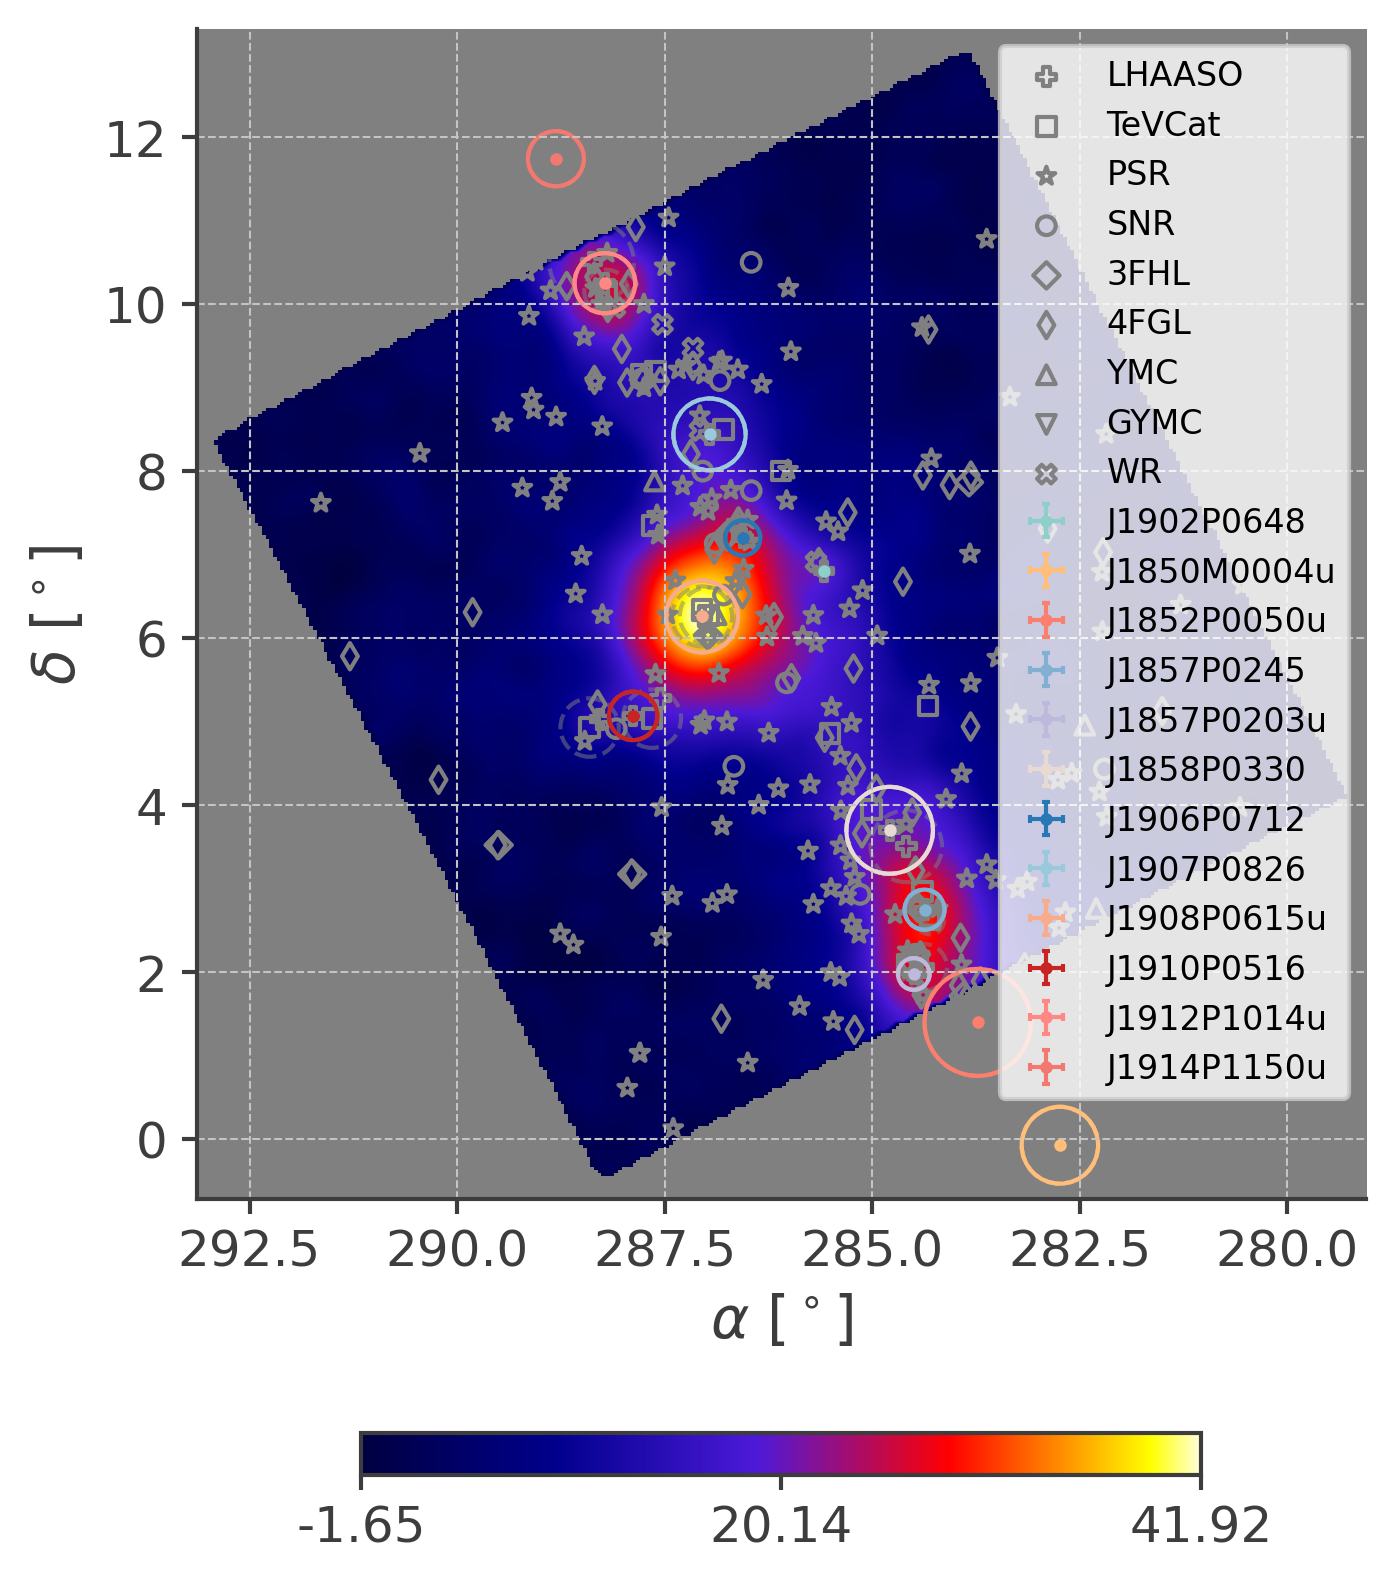

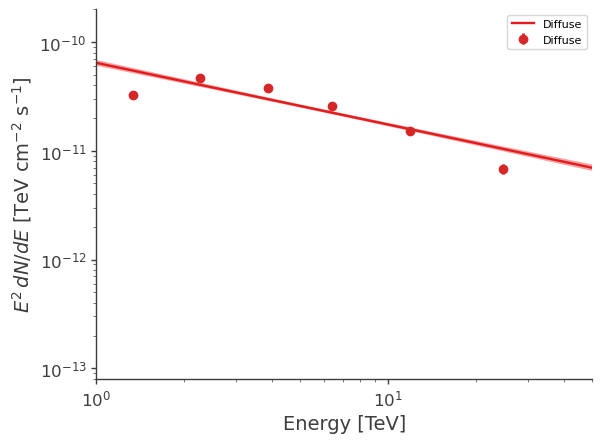

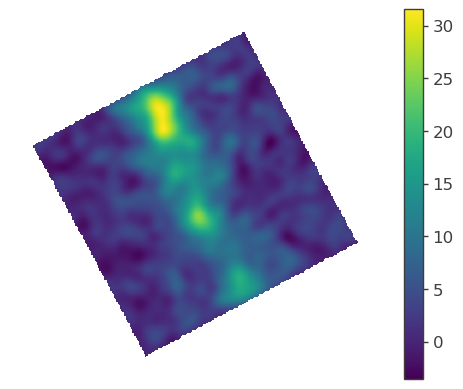

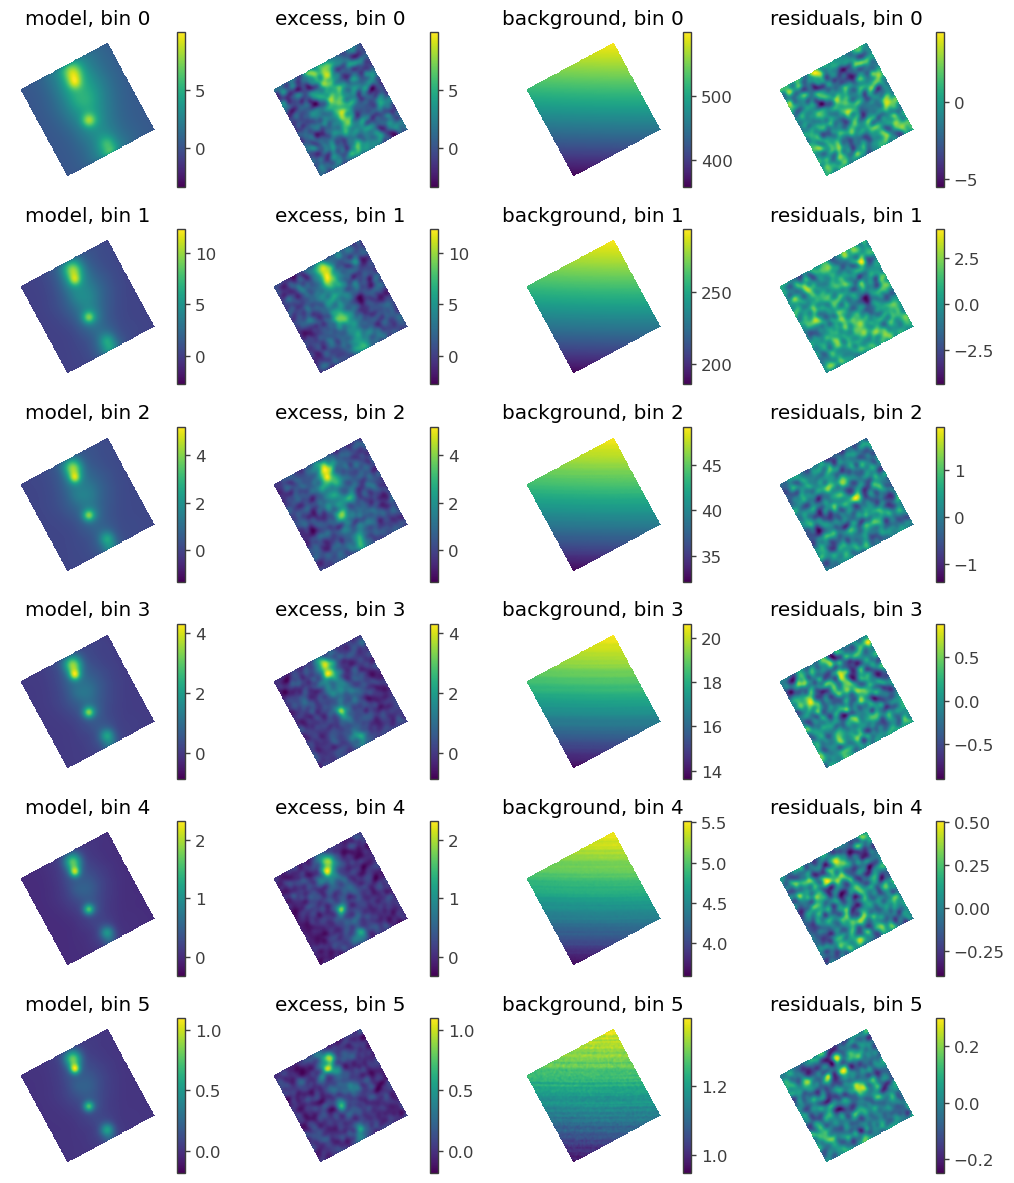

<Figure size 640x480 with 0 Axes>

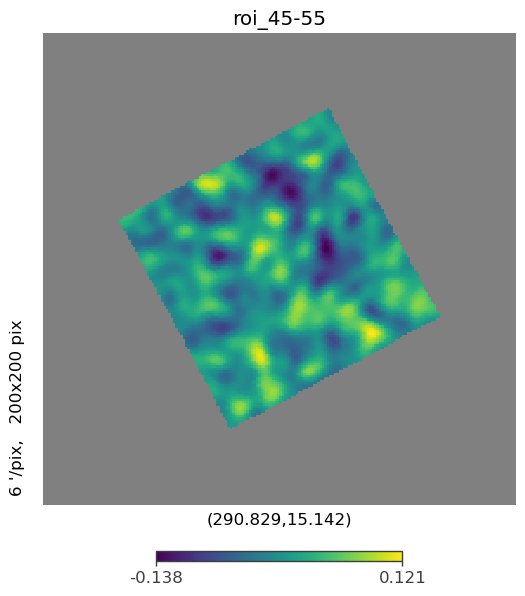

LHAASO:  1 286.96 8.44 1WCDA J1907+0826  0.43
LHAASO:  2 288.22 10.25 1LHAASO J1912+1014u  0.36
LHAASO:  3 288.38 10.5 1LHAASO J1912+1014u   0.5
LHAASO:  4 288.73 11.84  1LHAASO J1914+1150u  0.21
LHAASO:  5 288.81 11.74  1LHAASO J1914+1150u   0.33
LHAASO:  6 289.78 15.93  1LHAASO J1919+1556  0.0
LHAASO:  7 289.78 15.93  1KM2A J1919+1556  0
LHAASO:  8 290.7 14.06 1LHAASO J1922+1403  0.18
LHAASO:  9 290.73 14.11 1LHAASO J1922+1403   0.0
LHAASO:  10 291.09 16.15 1LHAASO J1924+1609  1.45
LHAASO:  11 290.53 15.71 1LHAASO J1924+1609   1.22
LHAASO:  12 292.07 18.23  1LHAASO J1928+1813u  0.63
LHAASO:  13 292.07 18.23  1KM2A J1928+1813u  0
LHAASO:  14 292.14 17.78 1LHAASO J1928+1746u  0.17
LHAASO:  15 292.17 17.89 1LHAASO J1928+1746u   0.0
LHAASO:  16 292.34 18.77 1LHAASO J1929+1846u*  0.49
LHAASO:  17 292.04 18.97 1LHAASO J1929+1846u*   0.0
LHAASO:  18 292.79 16.9  1LHAASO J1931+1653  0.0
LHAASO:  19 292.79 16.9  1KM2A J1931+1653  0
LHAASO:  20 294.32 21.48  1LHAASO J1937+2128  1.43
LHAASO:  2

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.10 +/- 0.15) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1457.045949
total        1457.045949

Values of statistical measures:

statistical measures
AIC           2916.091920
BIC           2926.207827

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.13 +/- 0.13) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1534.557955
total        1534.557955

Values of statistical measures:

statistical measures
AIC           3071.115932
BIC           3081.231839

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.16 +/- 0.17) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1448.033174
total        1448.033174

Values of statistical measures:

statistical measures
AIC           2898.066370
BIC           2908.182277

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.52 +/- 0.15) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1433.888884
total        1433.888884

Values of statistical measures:

statistical measures
AIC           2869.777791
BIC           2879.893698

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.80 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1346.584401
total        1346.584401

Values of statistical measures:

statistical measures
AIC           2695.168824
BIC           2705.284732

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.16 +/- 0.25) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1272.358838
total        1272.358838

Values of statistical measures:

statistical measures
AIC           2546.717699
BIC           2556.833606


100%|██████████| 6/6 [00:44<00:00,  7.42s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



21:59:24 INFO      Region of Interest:                                                                   ]8;id=82991;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=763891;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=968386;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=833996;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (295.976, 23.890), model radius:      ]8;id=827316;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=610372;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.500 deg, display radius: 7.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=275727;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=101923;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=399097;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=833192;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=336136;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=354843;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 90 x 90 px                                                             ]8;id=165342;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=233739;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=10904;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=259226;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=819080;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=6017;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=255908;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=825886;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=583063;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=974518;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=439677;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=477744;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=252180;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=526303;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=259786;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=813256;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=981637;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=764089;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=335764;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=548553;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=486256;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=528105;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  1.876161e+07  1.871329e+07  1.002582          30466  \
1   1   1024   RING  9.214918e+06  9.159318e+06  1.006070          30466   
2   2   1024   RING  1.538014e+06  1.523493e+06  1.009531          30466   
3   3   1024   RING  6.507364e+05  6.387448e+05  1.018774          30466   
4   4   1024   RING  1.735133e+05  1.693975e+05  1.024297          30466   
5   5   1024   RING  4.372031e+04  4.232967e+04  1.032853          30466   

   Area (deg^2)  
0     99.882501  
1     99.882501  
2     99.882501  
3     99.882501  
4     99.882501  
5     99.882501

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=947547;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=869377;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=469835;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=337545;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=693338;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=178952;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=717219;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=513175;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=75482;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=872191;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=795658;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=689236;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

21:59:25 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=113613;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=268147;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

21:59:26 INFO      J1928P1746u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=398144;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=891732;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=536056;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=750717;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=7.90e-14 kb=(1.00e-15, 1.79e-13) index=-2.22 indexb=(-2.72,-1.72)                             

         INFO      Mor:                                                                                ]8;id=295282;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=320204;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.17 sb=(0.07,0.27) fitrange=0.35                                                         

         INFO      J1929P1846u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=381127;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=355245;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=966708;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=310121;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=2.48e-13 kb=(2.48e-15, 4.68e-13) index=-2.37 indexb=(-2.77,-1.97)                             

         INFO      Mor:                                                                                ]8;id=721466;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=606725;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.49 sb=(0.39,0.59) fitrange=0.50                                                         

         INFO      J1937P2128 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=335004;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=609212;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=818257;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=729736;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=2.08e-13 kb=(2.08e-15, 1.39e-12) index=-2.43 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=418846;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=130086;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=1.25 sb=(0.10,2.40) fitrange=4.05                                                         

         INFO      J1945P2424 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=672051;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=780969;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#319\319]8;;\

         INFO      Spec:                                                                               ]8;id=954633;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=900328;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=4.27e-13 kb=(4.27e-15, 1.45e-12) index=-2.56 indexb=(-3.36,-1.76)                             

         INFO      Mor:                                                                                ]8;id=507913;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=190239;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=1.29 sb=(0.74,1.84) fitrange=1.85                                                         

         INFO      J1952P2922 in model_radius: 7.5 sf:True pf:True kf:True indexf:True                 ]8;id=940151;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=895445;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=617050;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=52547;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=5.50e-14 kb=(1.00e-15, 1.55e-13) index=-2.52 indexb=(-3.52,-1.52)                             

         INFO      Mor: fitrange=0.35                                                                  ]8;id=766427;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=364038;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\

         INFO      J1954P2836u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=36294;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=991408;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=88845;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=444678;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=3.40e-14 kb=(1.00e-15, 1.14e-13) index=-2.22 indexb=(-3.12,-1.32)                             

         INFO      Mor: fitrange=0.35                                                                  ]8;id=776522;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=268644;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\

         INFO      J1956P2921 in model_radius: 7.5 sf:True pf:True kf:True indexf:True                 ]8;id=51198;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=225906;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#326\326]8;;\

         INFO      Spec:                                                                               ]8;id=742805;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=849416;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#347\347]8;;\
                   K=1.47e-13 kb=(1.47e-15, 4.67e-13) index=-2.03 indexb=(-2.63,-1.43)                             

         INFO      Mor:                                                                                ]8;id=686997;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=861808;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#349\349]8;;\
                   sigma=0.99 sb=(0.64,1.34) fitrange=1.90                                                         

         INFO      Set diffuse range: [51, 67] [-8, 8]                                                ]8;id=399122;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=556544;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1158\1158]8;;\

         INFO      ra dec coner:                                                                      ]8;id=63949;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=935064;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1159\1159]8;;\

         INFO      (298.5189767070012, 12.115317313203914)                                            ]8;id=14708;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=246597;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1160\1160]8;;\

         INFO      (307.5310820852163, 25.482712969212727)                                            ]8;id=392996;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=60701;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1161\1161]8;;\

         INFO      (291.8021754333734, 33.859627455361014)                                            ]8;id=767285;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=73235;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1162\1162]8;;\

         INFO      (283.84428900705404, 19.682112340655358)                                           ]8;id=83792;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=172175;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1163\1163]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=869795;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=607899;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1202\1202]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 7.129758471575483e-06                                                 ]8;id=275912;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=95913;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1203\1203]8;;\
                  ratio: 0.05626489646225191                                                                       

         INFO      set K to: 1e-12                                                                    ]8;id=996581;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=132564;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1204\1204]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case11_dust_bkg_template.fits           ]8;id=926698;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=496535;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1231\1231]8;;\

Model summary:
==============

                  N
Point sources     2
Extended sources  6
Particle sources  0

Free parameters (6):
--------------------

                                        value min_value max_value   
J1937P2128.spectrum.main.Powerlaw.K       0.0       0.0       0.0  \
J1937P2128.spectrum.main.Powerlaw.index -2.43      -4.0      -1.0   
J1945P2424.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1945P2424.spectrum.main.Powerlaw.index -2.56     -3.36     -1.76   
Diffuse.spectrum.main.Powerlaw.K          0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index     -2.5      -4.5      -0.5   

                                                   unit  
J1937P2128.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1937P2128.spectrum.main.Powerlaw.index                  
J1945P2424.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1945P2424.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K         keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                     

Fixed parameters (40):
---------------------

                                                                                      value   
J1928P1746u.Gaussian_on_sphere.lon0                                                  292.14  \
J1928P1746u.Gaussian_on_sphere.lat0                                                   17.78   
J1928P1746u.Gaussian_on_sphere.sigma                                                   0.17   
J1928P1746u.spectrum.main.Powerlaw.K                                                    0.0   
J1928P1746u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1928P1746u.spectrum.main.Powerlaw.index                                              -2.22   
J1929P1846u.Gaussian_on_sphere.lon0                                                  292.34   
J1929P1846u.Gaussian_on_sphere.lat0                                                   18.77   
J1929P1846u.Gaussian_on_sphere.sigma                                                   0.49   
J1929P1846u.spectrum.main.Powerlaw.K                                                    0.0   
J1929P1846u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1929P1846u.spectrum.main.Powerlaw.index                                              -2.37   
J1937P2128.Gaussian_on_sphere.lon0                                                    294.3   
J1937P2128.Gaussian_on_sphere.lat0                                                     21.0   
J1937P2128.Gaussian_on_sphere.sigma                                                    1.25   
J1937P2128.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1945P2424.Gaussian_on_sphere.lon0                                                   296.36   
J1945P2424.Gaussian_on_sphere.lat0                                                     24.4   
J1945P2424.Gaussian_on_sphere.sigma                                                    1.29   
J1945P2424.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1952P2922.position.ra                                                               298.05   
J1952P2922.position.dec                                                               29.38   
J1952P2922.spectrum.main.Powerlaw.K                                                     0.0   
J1952P2922.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1952P2922.spectrum.main.Powerlaw.index                                               -2.52   
J1954P2836u.position.ra                                                               298.5   
J1954P2836u.position.dec                                                              28.57   
J1954P2836u.spectrum.main.Powerlaw.K                                                    0.0   
J1954P2836u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1954P2836u.spectrum.main.Powerlaw.index                  

21:59:27 INFO      Considering 4 dec bins for extended source J1928P1746u           ]8;id=744849;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=224595;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 17.780                      ]8;id=70315;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=703182;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1929P1846u           ]8;id=758666;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=32007;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.770                      ]8;id=687854;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=813046;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 13 dec bins for extended source J1937P2128           ]8;id=196018;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=943657;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 21.000                      ]8;id=259208;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=336367;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 10 dec bins for extended source J1945P2424           ]8;id=988758;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=607722;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 24.400                      ]8;id=182031;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=350150;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1956P2921            ]8;id=928552;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=441483;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 29.350                      ]8;id=486154;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=402354;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=910412;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=130033;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 23.122                      ]8;id=138469;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=744975;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=605014;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=11265;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=974995;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=800007;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                              
J1937P2128.spectrum.main.Powerlaw.K       (1.16 -0.31 +0.4) x 10^-22  \
J1937P2128.spectrum.main.Powerlaw.index               -2.35 +/- 0.23   
J1945P2424.spectrum.main.Powerlaw.K      (3.64 -0.29 +0.31) x 10^-22   
J1945P2424.spectrum.main.Powerlaw.index               -2.59 +/- 0.07   
Diffuse.spectrum.main.Powerlaw.K         (1.38 -0.12 +0.13) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                  -2.58 +/- 0.08   

                                                    unit  
parameter                                                 
J1937P2128.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1937P2128.spectrum.main.Powerlaw.index                   
J1945P2424.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1945P2424.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K         1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.65  0.45 -0.11 -0.70  0.22
-0.65  1.00 -0.17  0.27  0.28 -0.56
 0.45 -0.17  1.00 -0.14 -0.73  0.08
-0.11  0.27 -0.14  1.00  0.08 -0.61
-0.70  0.28 -0.73  0.08  1.00 -0.08
 0.22 -0.56  0.08 -0.61 -0.08  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        8778.278373
total       8778.278373

Values of statistical measures:

statistical measures
AIC          17568.557206
BIC          17629.253503

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

21:59:53 INFO      Considering 4 dec bins for extended source J1928P1746u           ]8;id=452768;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=847721;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 17.780                      ]8;id=797870;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=617033;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1929P1846u           ]8;id=359464;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=863277;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.770                      ]8;id=419224;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=158168;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 13 dec bins for extended source J1937P2128           ]8;id=809652;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=829288;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 21.000                      ]8;id=821117;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=216834;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 10 dec bins for extended source J1945P2424           ]8;id=554789;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=755894;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 24.400                      ]8;id=852805;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=55810;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1956P2921            ]8;id=771397;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=775966;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 29.350                      ]8;id=601353;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=778267;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=838543;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=3186;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 23.122                      ]8;id=119809;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=155061;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(295.5322265625, 24.296477994805656)


<Figure size 640x480 with 0 Axes>

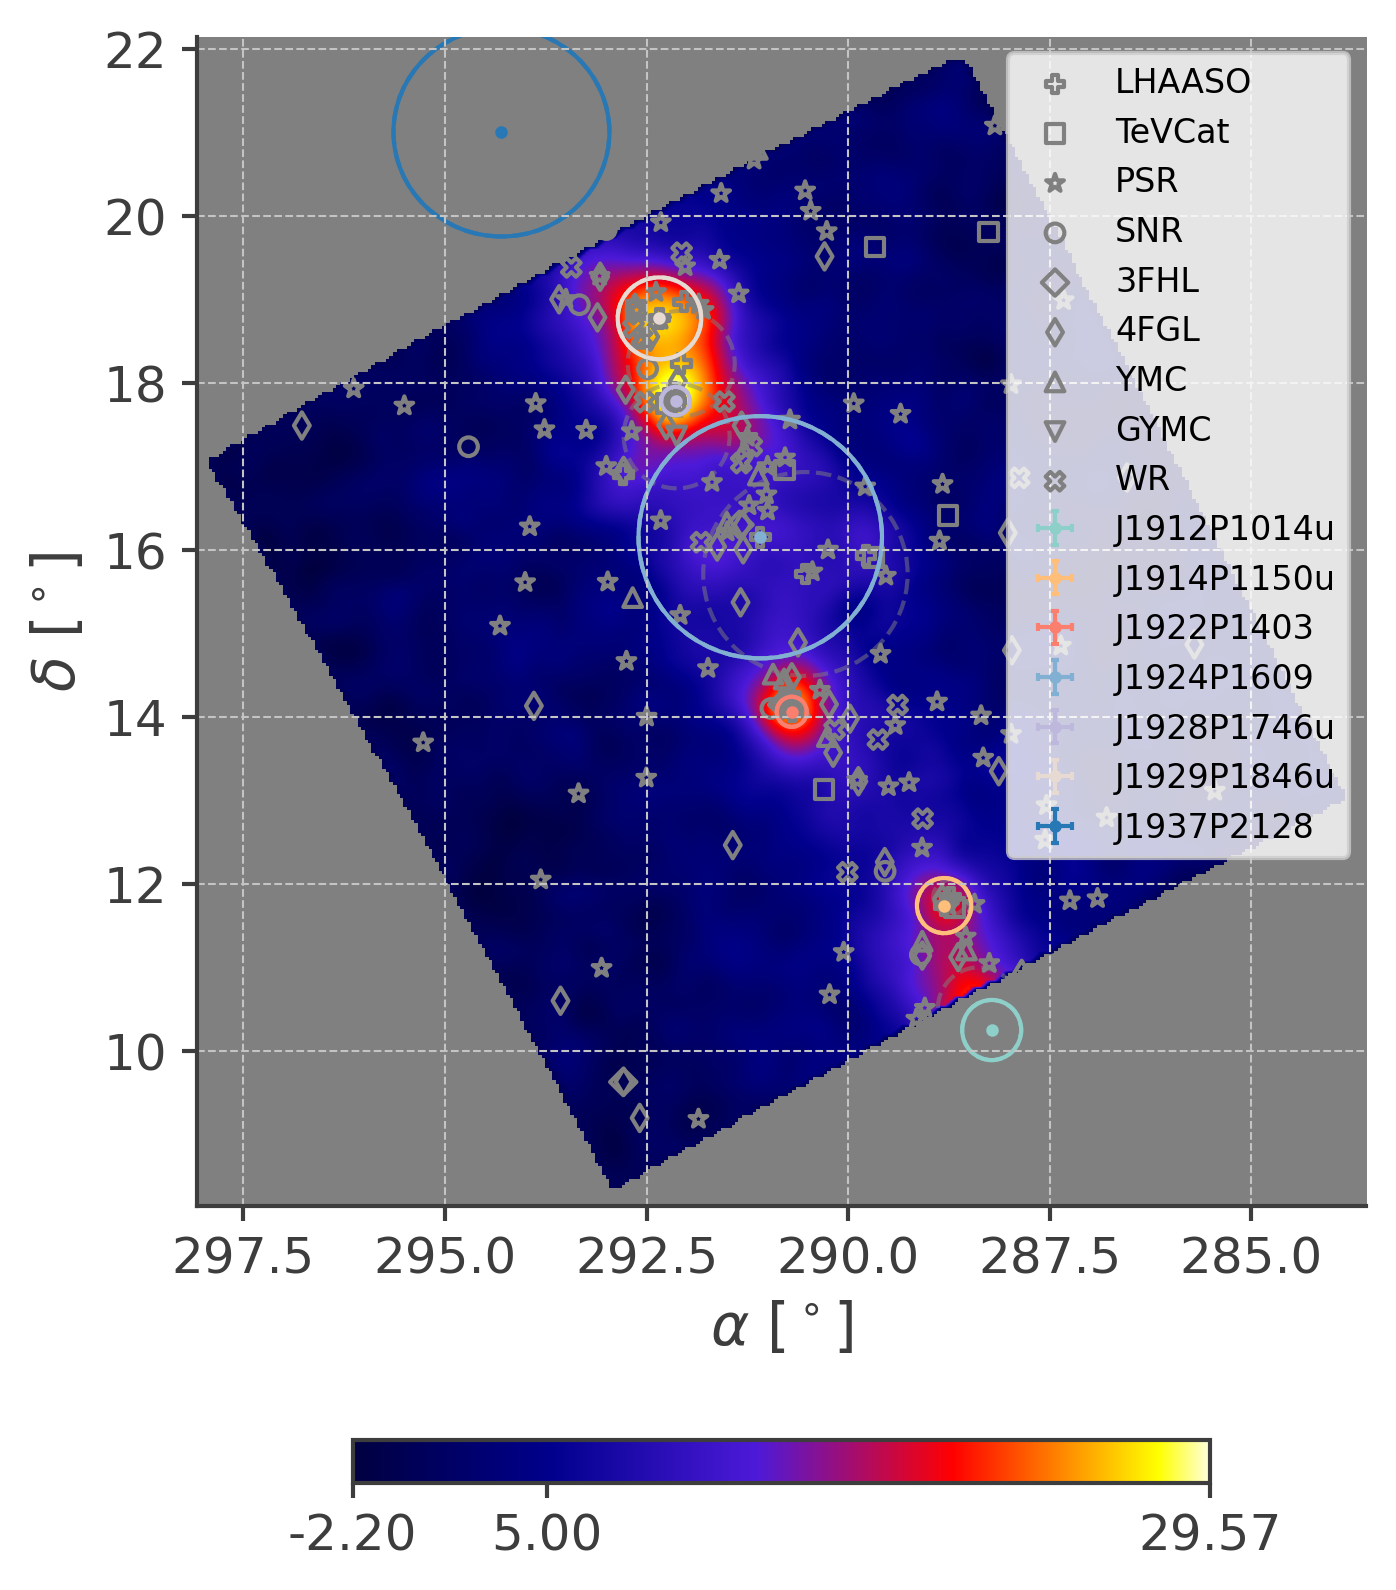

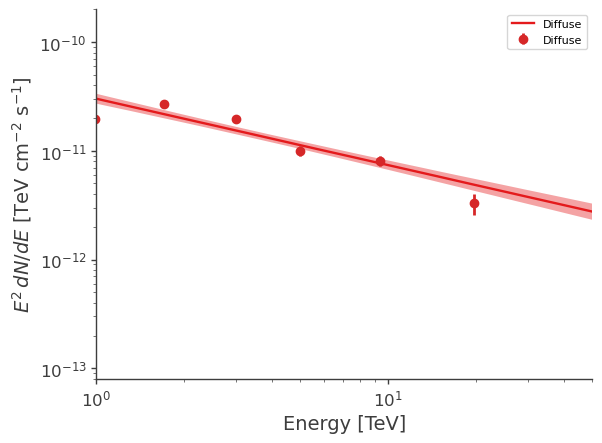

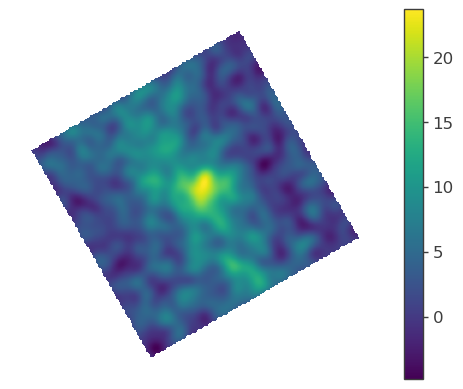

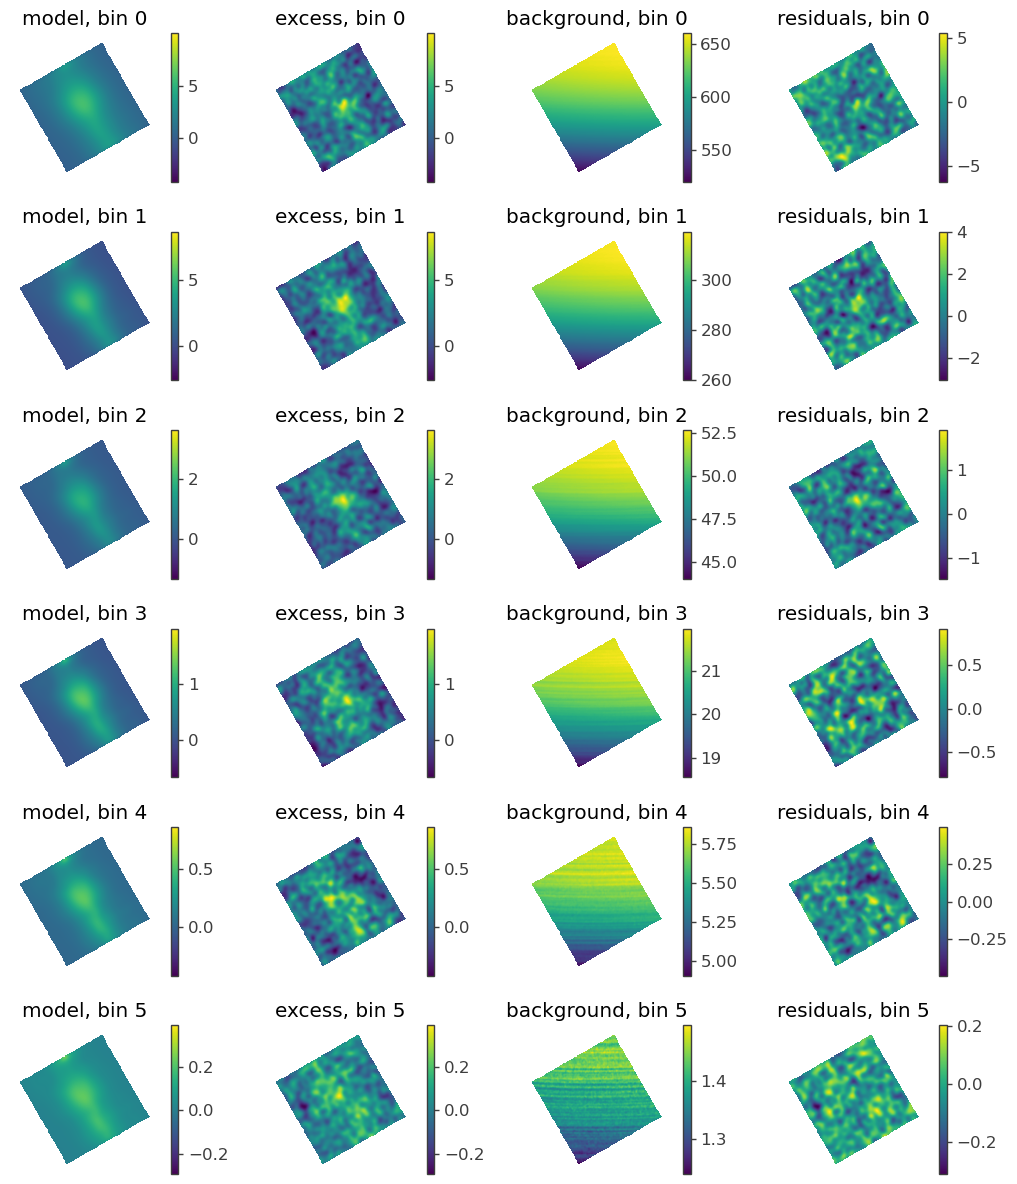

<Figure size 640x480 with 0 Axes>

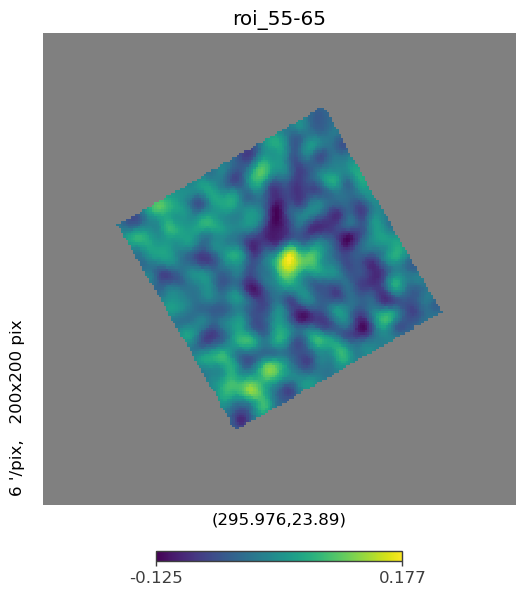

LHAASO:  1 292.07 18.23  1LHAASO J1928+1813u  0.63
LHAASO:  2 292.07 18.23  1KM2A J1928+1813u  0
LHAASO:  3 292.14 17.78 1LHAASO J1928+1746u  0.17
LHAASO:  4 292.17 17.89 1LHAASO J1928+1746u   0.0
LHAASO:  5 292.34 18.77 1LHAASO J1929+1846u*  0.49
LHAASO:  6 292.04 18.97 1LHAASO J1929+1846u*   0.0
LHAASO:  7 292.79 16.9  1LHAASO J1931+1653  0.0
LHAASO:  8 292.79 16.9  1KM2A J1931+1653  0
LHAASO:  9 294.32 21.48  1LHAASO J1937+2128  1.43
LHAASO:  10 294.3 21.0  1LHAASO J1937+2128   1.25
LHAASO:  11 296.36 24.4 1LHAASO J1945+2424*  1.29
LHAASO:  12 297.42 23.97 1LHAASO J1945+2424*   0.36
LHAASO:  13 297.94 26.15  1LHAASO J1951+2608  1.0
LHAASO:  14 297.94 26.15  1KM2A J1951+2608  0
LHAASO:  15 298.05 29.38 1LHAASO J1952+2922  0.0
LHAASO:  16 298.55 28.6  1WCDA J1954+2836u  0.0
LHAASO:  17 298.5 28.57  1LHAASO J1954+2836u   0.0
LHAASO:  18 299.24 29.35 1WCDA J1956+2921  0.99
LHAASO:  19 298.84 28.92 1LHAASO J1956+2921   0.78
LHAASO:  20 299.78 28.78  1LHAASO J1959+2846u  0.29
LHAASO:  21 

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (9.4 +/- 1.5) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1471.494712
total        1471.494712

Values of statistical measures:

statistical measures
AIC           2944.989446
BIC           2955.105550

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.75 +/- 0.13) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1645.992774
total        1645.992774

Values of statistical measures:

statistical measures
AIC           3293.985569
BIC           3304.101673

In [8]:
%matplotlib inline
#####   Data Initialize
# activate_warnings()

# maptree = "../../data/gcd_new.root"
# response="../../data/WCDA_DR_psf.root"

# maptree =  "../../data/hsc2healpix_20210305_20220930.root"
# response = "../../data/WCDA_DR2.root"

# maptree =  "../../data/20210305_20230731_ihep_no_goodlist.root"
# response = "../../data/DR_ihep_MK2.root"

# maptree =  "../../data/20210305_20230731_ihep_goodlist.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"

maptree =  "../../data/20210305-20230731_trans_fromhsc.root"
response = "../../data/DR_ihep_MK2_newoldDRpsf.root"


region_name="Diffuse_WCDA_case11"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')


nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix
pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(range(20,360,10)): # #!!!!!!!!!!!!!!!!!!!365 
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    # hp.mollview(signal,title="ROI",norm='hist')
    # hp.graticule()
    ra1,dec1=RA_center, Dec_center

    data_radius = 7
    model_radius = 7.5

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)

    #####   Data Situation
    %matplotlib inline
    WCDA.set_active_measurements(0, 5)
    WCDA.display()
    WCDA.psf_integration_method="exact"

    my.settransWCDA(WCDA, ra1, dec1)

    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=5, rtflux=20, rtindex=10, rtp=5,  detector="WCDA", roi=roi, pf=True, sf=True, kf=False, indexf=False,  mkf=True, mindexf=True,  setdeltabypar=True) #indexb=(-4,-1),

    Diffuse, diffscaleratio = my.set_diffusebkg(
                ra1, dec1, 8, 8, Kf=False, indexf=False, name=region_name, ifreturnratio=True, Kb=(1e-18, 1e-10), indexb=(-4.5, -0.5), index=-2.5, K=1e-12
                ) #Kn=1
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="ROOT", donwtlimit=True) #, ifgeterror=True
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources, diffscaleratio])

    resu = my.getressimple(WCDA, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_WCDA_llh-2.6.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi",
                    colors = my.colorall
                    )
    # try:
    Flux_WCDA0, jls0  = my.getdatapoint(WCDA, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1, iffixtans=1)
    import matplotlib as mpl

    x_Max=50.
    x_Min=1
    y_Min=0.8e-13
    y_Max=2e-10
    fig,ax = plt.subplots()
    plot_spectra(
        result[0].results,
        sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit="TeV/(s cm2)",
        subplot=ax,
        )

    my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"Diffuse","tab:red")

    ax.set_xlim(x_Min,x_Max)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
    ax.set_xlabel("Energy [TeV]")
    plt.legend()
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')
    # except:   pass
    #     continue

roi_15-25


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_25-35


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_35-45


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_45-55


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_55-65


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_65-75


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_75-85


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_85-95
roi_95-105
roi_105-115
roi_115-125
roi_125-135
roi_135-145
roi_145-155
roi_155-165
roi_165-175
roi_175-185
roi_185-195
roi_195-205
roi_205-215
roi_215-225
roi_225-235


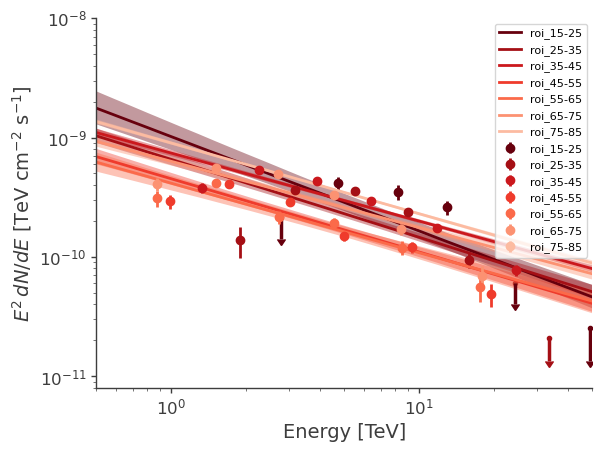

In [16]:
%matplotlib inline
import glob
gc = []
dk = []
dkf = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
ss = []
ssr= []
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=1e-8
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files): #[:7]
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    resultdict = resultsss.get_data_frame()
    gc.append(range(20,360,10)[i])
    dk.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
    try:
        dkf.append(resultsall[i][2][0])
    except:
        resultfile = np.load(f"../res/{region_name}/resultsall.npy")
        dkf = resultfile[9]
    if i < 7:
        # try:
        plot_spectra(
            resultsss,
            sources_to_use=["Diffuse"],
            include_extended=True,
            ene_min=x_Min,
            ene_max=x_Max,
            num_ene=30,
            energy_unit="TeV",
            flux_unit=f"TeV/(s cm2)", #*
            subplot=ax,
            plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i]} #
            )
        try:
            data = my.Draw_spectrum_fromfile(subfolder+"Spectrum_Diffuse.txt", label=name, color=my.red_palette[-(i+1)], subplot=ax, scale=1/dkf[i])
            my.spec2naima(f"./spec_{name}.txt", data)
        except:
            pass
        # except Exception as e:
        #     print(f"Error: {e}")
        #     continue
results=[gc,dk,de,den,dep,di,die,dien,diep, dkf]
np.save(f"../res/{region_name}/resultsall.npy",results)
from threeML.analysis_results import AnalysisResultsSet
resultsall
rrr = [it[0][0].results for it in resultsall]
analysis_set = AnalysisResultsSet(rrr)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band10-70.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band10-70.pdf",dpi=300)

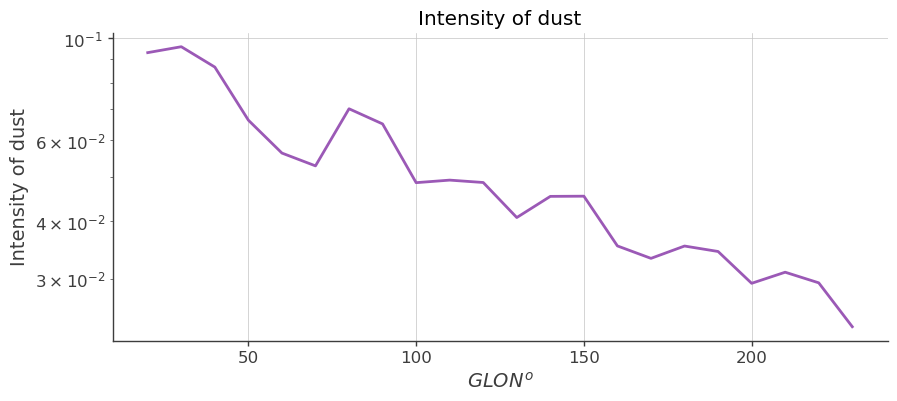

In [4]:
plt.figure(figsize=(10,4)) #
plt.plot(gc, np.array(dkf)) #np.array(den)*1e9, np.array(dep)*1e9 , fmt="o"
plt.yscale("log")
plt.title("Intensity of dust")

plt.ylabel(r"Intensity of dust")
# plt.ylim(1e-7, 1e-4)
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/dust.png",dpi=300)
plt.savefig(f"../res/{region_name}/dust.pdf",dpi=300)

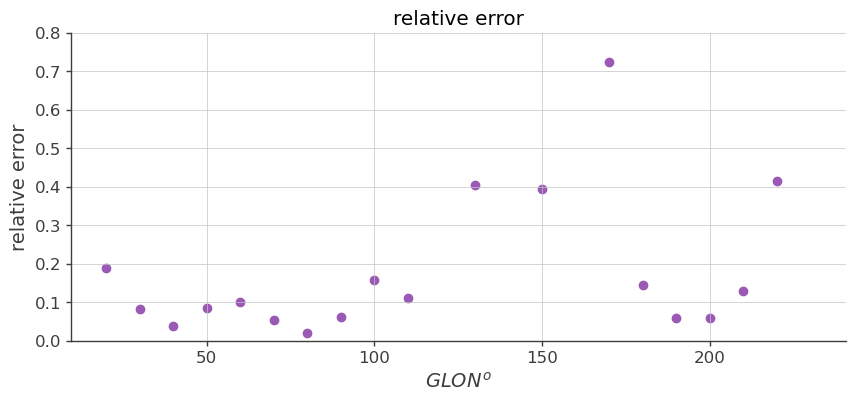

In [15]:
plt.figure(figsize=(10,4)) #
plt.scatter(gc, (np.array(de)*1e9)/(np.array(dk)*1e9), marker="o") #np.array(den)*1e9, np.array(dep)*1e9
# plt.yscale("log")
plt.title("relative error")
plt.ylim(0, 0.8)
plt.ylabel("relative error")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

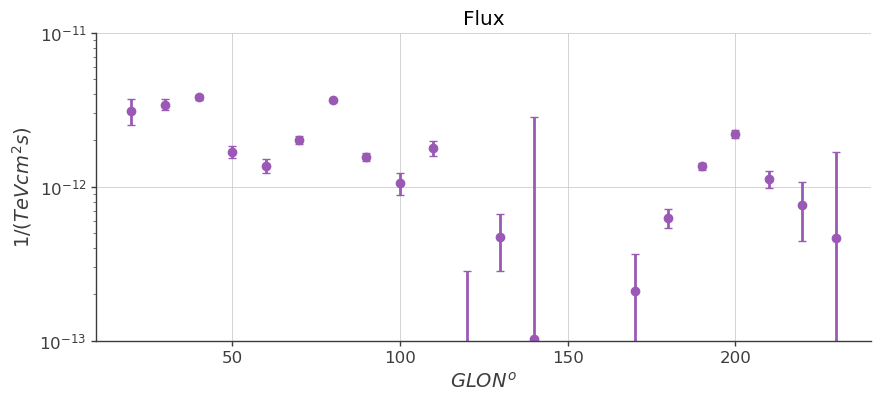

In [5]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9, [np.array(de)*1e9, np.array(de)*1e9], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-13, 1e-11)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

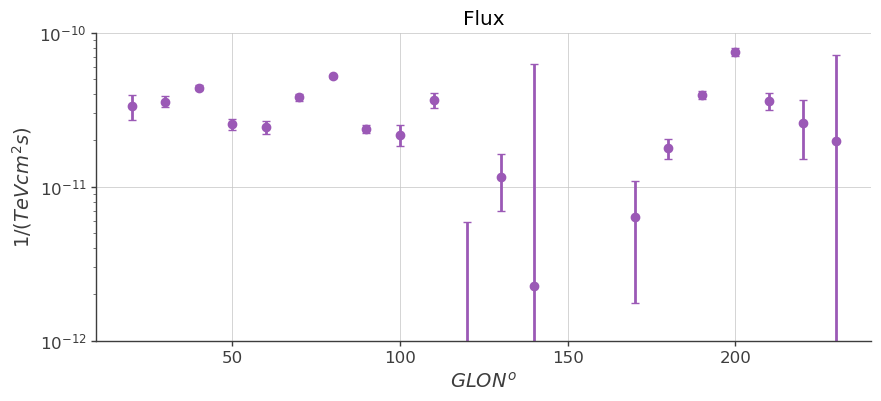

In [6]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9/np.array(dkf), [np.array(de)*1e9/np.array(dkf), np.array(de)*1e9/np.array(dkf)], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-12, 1e-10)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux_fullsky.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux_fullsky.pdf",dpi=300)

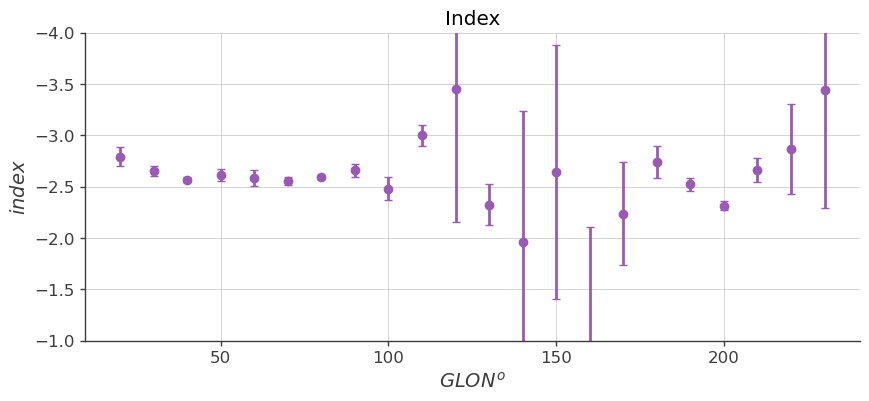

In [7]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, di, [die, die], fmt="o", capsize=3) #dien, diep
plt.ylim(-1,-4)
plt.title("Index")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()
plt.savefig(f"../res/{region_name}/index.png",dpi=300)
plt.savefig(f"../res/{region_name}/index.pdf",dpi=300)

In [ ]:
%matplotlib inline
import glob
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=1e-8
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[6:14]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    # try:
    plot_spectra(
        resultsss,
        sources_to_use=["Diffuse"],
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit=f"TeV/(s cm2)", #*
        subplot=ax,
        plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i+6]} #
        )
    # except Exception as e:
    #     print(f"Error: {e}")
    #     continue
    

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band70-150.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band70-150.pdf",dpi=300)